In [40]:
import numpy as np
import matplotlib.pyplot as plt

def _neighbors(r, c, n):
    nbrs = []
    if r > 0: nbrs.append((r-1, c))
    if r < n-1: nbrs.append((r+1, c))
    if c > 0: nbrs.append((r, c-1))
    if c < n-1: nbrs.append((r, c+1))
    return nbrs

def neighbors(r, c, n):
    nbrs = []
    nbrs.append(((r-1) % n, c % n))
    nbrs.append(((r+1) % n, c % n))
    nbrs.append((r % n, (c-1) % n))
    nbrs.append((r % n, (c+1) % n))
    return nbrs

def generate_signature_vector(n=25, source=(12, 12), num_walks=1000, p_term=0.1, gamma=0.9, print_progress=False):
    visits = np.zeros((n, n), dtype=np.float64)
    sr, sc = source
    rng = np.random.default_rng()

    for i in range(num_walks):
        if print_progress and i % (num_walks // 10) == 0:
            print(f"Walk {i}/{num_walks}")
        r, c = sr, sc
        load = 1.0              
        visits[r, c] += load       
        while True:
            if rng.random() <= p_term:
                break
            nbrs = neighbors(r, c, n)
            deg_v = len(nbrs)
            w_r, w_c = nbrs[rng.integers(deg_v)]
            deg_w = len(neighbors(w_r, w_c, n))
            p = 1.0 / deg_v
            u_vw = gamma / np.sqrt(deg_v * deg_w) 
            load *= u_vw / (p * (1.0 - p_term))
            r, c = w_r, w_c
            visits[r, c] += load

    return visits / num_walks

def plot_signature_vector(signature, n=25, p_term=0.1, source=(12, 12), vmin=None, vmax=None):
    plt.figure(figsize=(6, 6))
    plt.imshow(signature, origin="lower", vmin=vmin, vmax=vmax)
    plt.title(f"GRF-Style Signature Heatmap (n={n}, p_term={p_term}, source={source})")
    plt.colorbar(label="signature value")
    plt.tight_layout()

def plot_marginalized(signature, vmin=None, vmax=None, title=None, savepath=None):
    plt.figure(figsize=(6, 4))
    plt.plot(signature.sum(axis=0), label="column marginal")
    plt.plot(signature.sum(axis=1), label="row marginal")
    plt.title("Marginalized Signature Distribution")
    plt.xlabel("index")
    plt.ylabel("marginal value")
    plt.ylim(vmin, vmax)
    plt.legend()
    plt.tight_layout()
    if title:
        plt.title(title)
    if savepath:
        plt.savefig(savepath, bbox_inches="tight")

def plot_all_marginalized(signatures, labels, vmin=None, vmax=None, title=None, savepath=None):
    plt.figure(figsize=(6, 4))
    colors = plt.cm.viridis(np.linspace(0, 1, len(signatures)))
    for signature, label in zip(signatures, labels):
        plt.plot(signature.sum(axis=0), label=f"{label} column marginal", color=colors[labels.index(label)])
        plt.plot(signature.sum(axis=1), label=f"{label} row marginal", color=colors[labels.index(label)], linestyle='--')
    plt.title("Marginalized Signature Distributions")
    plt.xlabel("index")
    plt.ylabel("marginal value")
    plt.ylim(vmin, vmax)
    plt.legend()
    plt.tight_layout()
    if title:
        plt.title(title)
    if savepath:
        plt.savefig(savepath, bbox_inches="tight")

In [ ]:
n = 25
p_term = 0.0001
num_walks = 10000
source = (n // 2, n // 2)
gamma = 0.999
signature_fine = generate_signature_vector(n=n, source=source, num_walks=num_walks, p_term=p_term, gamma=gamma)
plot_signature_vector(signature_fine, n=n, p_term=p_term, source=source)

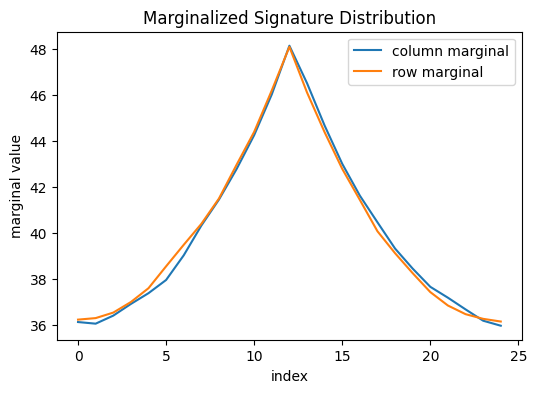

In [3]:
plot_marginalized(signature_fine)

In [19]:
n = 25
p_term = 0.01
num_walks = 500
source = (n // 2, n // 2)
gamma = 0.9
signature_vectors = [[[] for _ in range(n)] for _ in range(n)]
for i in range(n):
    for j in range(n):
        signature_vectors[i][j] = generate_signature_vector(n=n, source=(i, j), num_walks=num_walks, p_term=p_term, gamma=gamma)

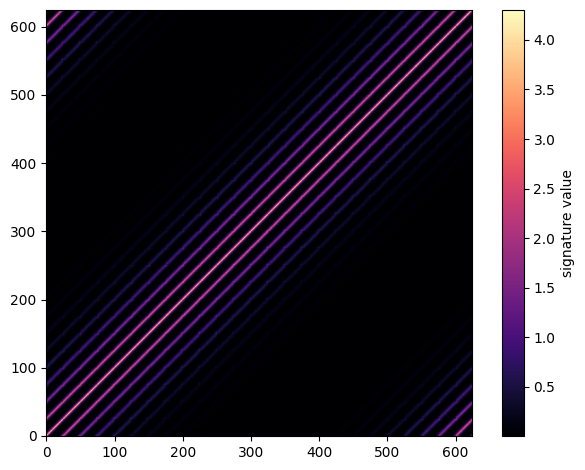

In [20]:
kernel_matrix = np.zeros((n*n, n*n), dtype=np.float64)
for i in range(n):
    for i_ in range(n):
        for j in range(n):
            for j_ in range(n):
                kernel_matrix[i*n + i_, j*n + j_] = np.multiply(signature_vectors[j][j_], signature_vectors[i][i_]).sum()
plt.set_cmap("magma")
plt.imshow(kernel_matrix, origin="lower")
plt.colorbar(label="signature value")
plt.tight_layout()

Text(0.5, 1.0, 'Row reshaped back to 2-D grid')

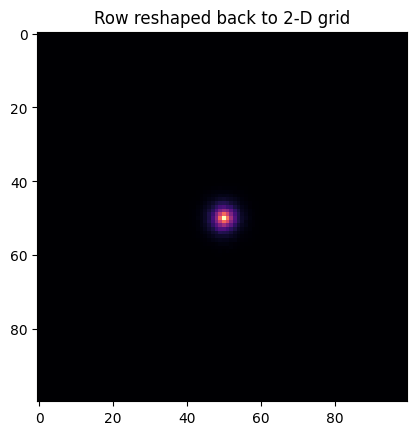

In [22]:
i0 = (n//2)*n + (n//2)      # center node index
row = kernel_matrix[i0, :].reshape(n, n)
plt.imshow(row)
plt.title("Row reshaped back to 2-D grid")

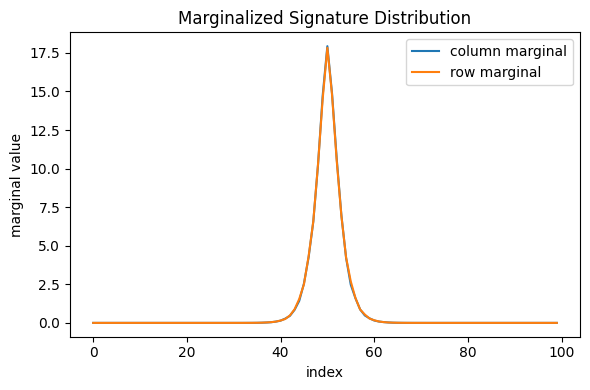

In [25]:
plot_marginalized(row)

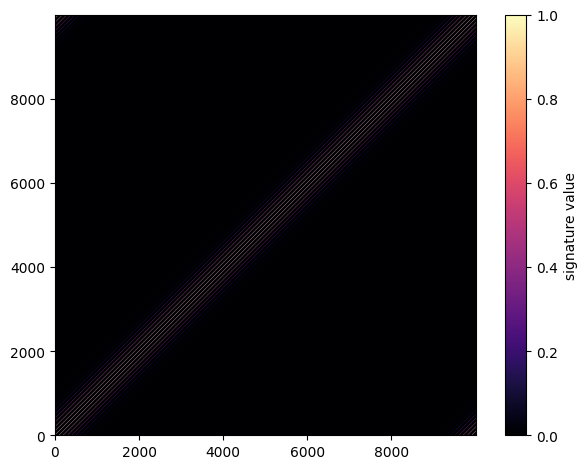

In [5]:
plt.set_cmap("magma")
plt.imshow(kernel_matrix, origin="lower", vmax=1.)
plt.colorbar(label="signature value")
plt.tight_layout()

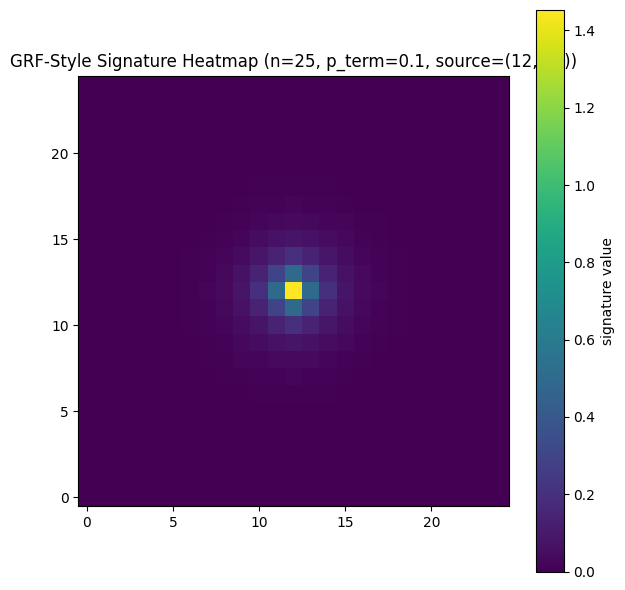

In [22]:
n = 25
p_term = 0.1
num_walks = 100000
source = (n // 2, n // 2)
gamma = 0.9
signature = generate_signature_vector(n=n, source=source, num_walks=num_walks, p_term=p_term, gamma=gamma)
plot_signature_vector(signature, n=n, p_term=p_term, source=source)

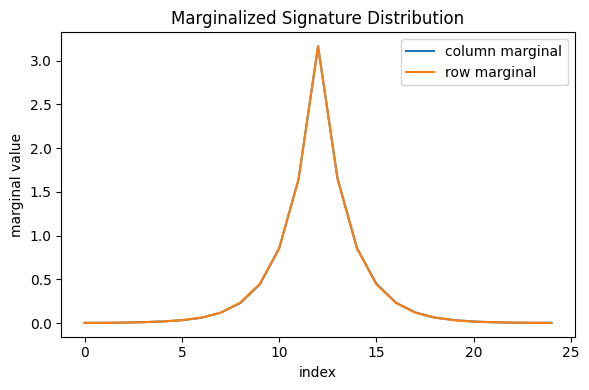

In [23]:
plot_marginalized(signature)

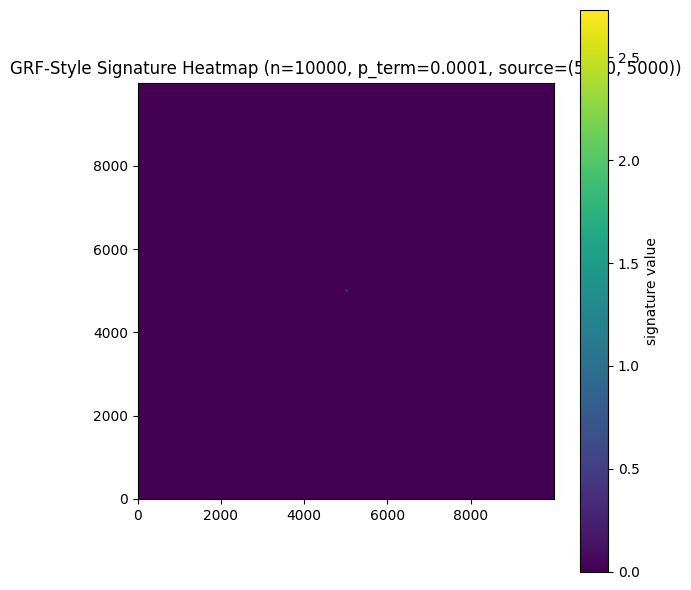

In [ ]:
n = 10000
p_term = 0.0001
num_walks = 1000
source = (n // 2, n // 2)
gamma = 0.999
signature = generate_signature_vector(n=n, source=source, num_walks=num_walks, p_term=p_term, gamma=gamma)
plot_signature_vector(signature, n=n, p_term=p_term, source=source, vmin=0., vmax=None)

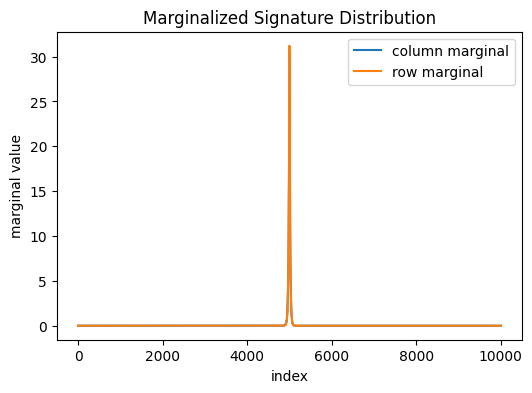

In [4]:
plot_marginalized(signature)

In [6]:
n = 25
p_term = 0.01
num_walks = 1000
source = (n // 2, n // 2)
gamma = 0.9

signature_vector_matrix = [[np.zeros((n, n), dtype=np.float64) for _ in range(n)] for _ in range(n)]
for i in range(n):
    for j in range(n):
        signature_vector_matrix[i][j] = generate_signature_vector(n=n, source=(i, j), num_walks=num_walks, p_term=p_term, gamma=gamma)

print("Sum of signature matrix vectors")
total_signature = np.sum(signature_vector_matrix, axis=(0, 1))

Sum of signature matrix vectors


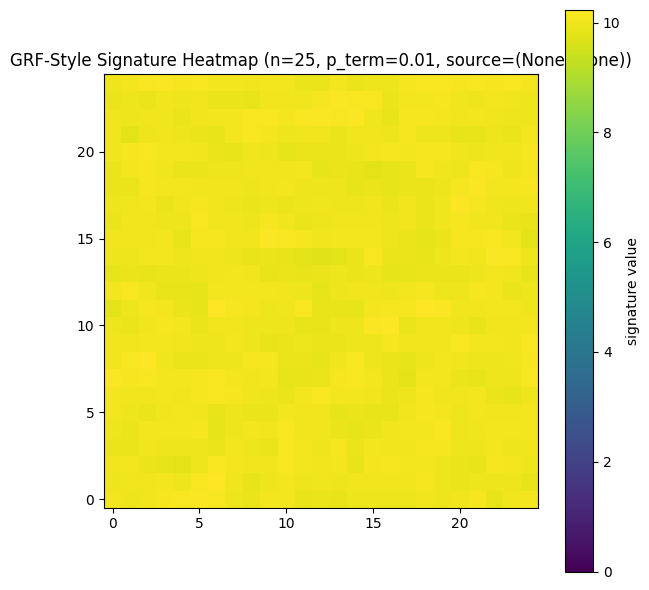

In [14]:
plot_signature_vector(total_signature, n=n, p_term=p_term, source=(None, None), vmin=0.)

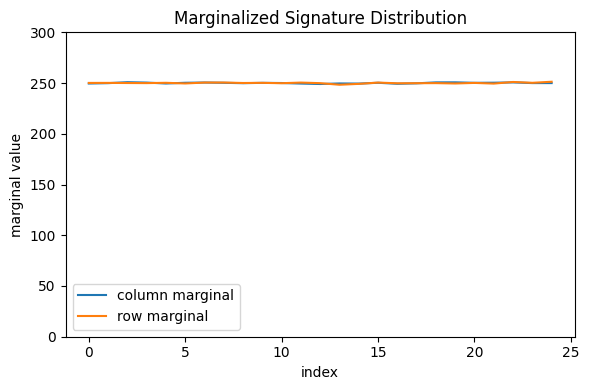

In [12]:
plot_marginalized(total_signature, vmin=0., vmax=300)

Running diffusion → Gaussian...


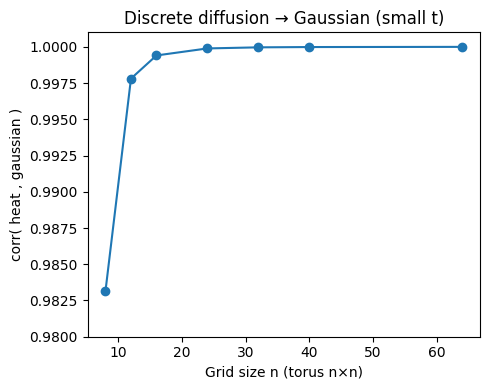

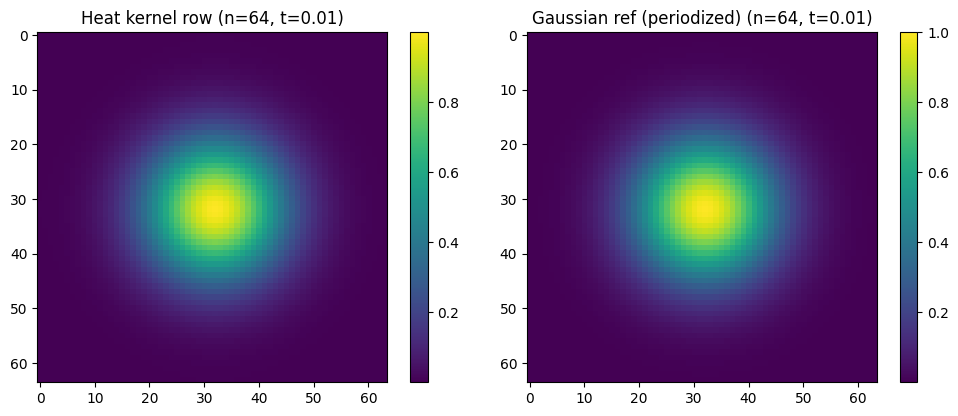

n=  8  corr(heat,gaussian)=0.983156
n= 12  corr(heat,gaussian)=0.997807
n= 16  corr(heat,gaussian)=0.999405
n= 24  corr(heat,gaussian)=0.999890
n= 32  corr(heat,gaussian)=0.999965
n= 40  corr(heat,gaussian)=0.999985
n= 64  corr(heat,gaussian)=0.999997

Running resolvent (discrete → continuum)...


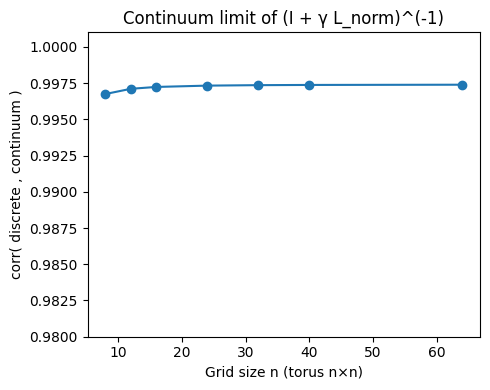

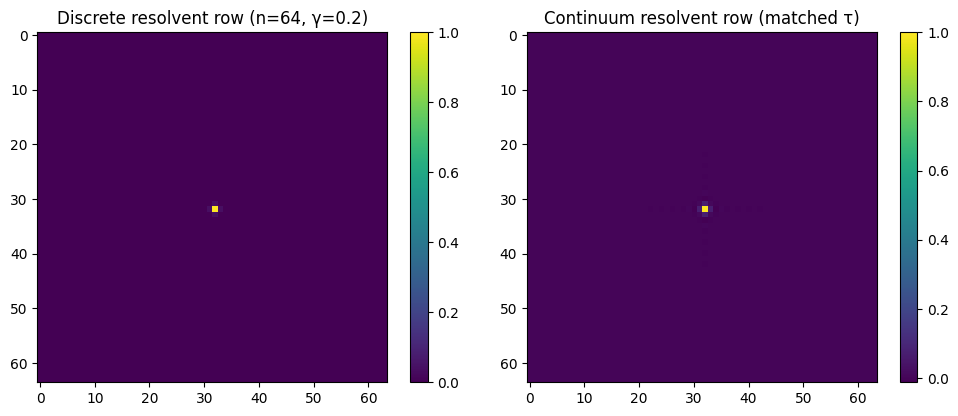

n=  8  corr(discrete,continuum)=0.996746
n= 12  corr(discrete,continuum)=0.997106
n= 16  corr(discrete,continuum)=0.997233
n= 24  corr(discrete,continuum)=0.997324
n= 32  corr(discrete,continuum)=0.997356
n= 40  corr(discrete,continuum)=0.997370
n= 64  corr(discrete,continuum)=0.997386

Running GRF estimator → discrete resolvent (fixed n=24)...


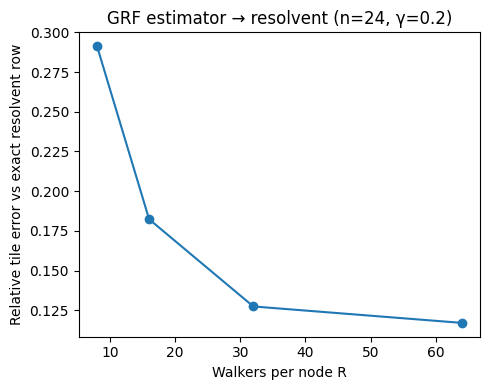

R=  8  rel_tile_err=0.2913
R= 16  rel_tile_err=0.1823
R= 32  rel_tile_err=0.1274
R= 64  rel_tile_err=0.1170


In [1]:
# limit_experiments.py
# ------------------------------------------------------------
# Shows two convergence stories on 2-D torus (periodic grid):
# 1) Discrete diffusion kernel e^{-t L / h^2} → (periodized) Gaussian
# 2) GRF (random-walk) → resolvent (I + γ L_norm)^{-1}, and
#    discrete resolvent → continuum resolvent under τ = γ h^2 / 4
#
# Deps: numpy, matplotlib
# ------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt


# ================================
# Utilities: torus FFT kernels
# ================================

def heat_kernel_row_torus_fft(n: int, t: float):
    """
    Heat kernel row (impulse response) of exp(-t L / h^2) on n x n torus via FFT.
    Returns (n,n) image normalized to max 1 (shape comparison).
    """
    h = 1.0 / n
    ks = np.arange(n)
    ls = np.arange(n)
    w_k = 2.0 * np.pi * ks / n
    w_l = 2.0 * np.pi * ls / n
    lam = (4.0 - 2.0 * np.cos(w_k)[:, None] - 2.0 * np.cos(w_l)[None, :])  # eigenvalues of comb. Laplacian
    lam_scaled = lam / (h*h)
    spec = np.exp(-t * lam_scaled)                 # spectral multiplier
    k = np.fft.ifft2(spec).real                    # impulse response (row from origin)
    k = np.fft.fftshift(k)                         # center peak for plotting
    k /= (k.max() + 1e-12)
    return k


def gaussian_row_torus(n: int, t: float):
    """
    Periodized Gaussian on [0,1)^2 sampled on an n x n grid; normalized to max 1.
    """
    grid = np.arange(n) / n
    xs, ys = np.meshgrid(grid, grid, indexing='ij')
    # minimum-image distance; center at (0.5, 0.5) to match fftshifted impulse
    dx = (xs - 0.5 + 0.5) % 1.0 - 0.5
    dy = (ys - 0.5 + 0.5) % 1.0 - 0.5
    dist2 = dx*dx + dy*dy
    g = np.exp(-dist2 / (4.0 * t))
    g /= (g.max() + 1e-12)
    return g


def lambda_norm_torus(n: int):
    """Eigenvalues of normalized Laplacian L_norm on n x n torus."""
    ks = np.arange(n)
    ls = np.arange(n)
    w_k = 2.0*np.pi*ks/n
    w_l = 2.0*np.pi*ls/n
    lam = 1.0 - 0.5*(np.cos(w_k)[:,None] + np.cos(w_l)[None,:])  # shape (n,n)
    return lam


def resolvent_row_norm_fft(n: int, gamma: float):
    """
    Discrete resolvent row (impulse) of (I + γ L_norm)^(-1) on torus via FFT.
    Returns (n,n) normalized to max 1.
    """
    lam = lambda_norm_torus(n)
    spec = 1.0 / (1.0 + gamma * lam)
    k = np.fft.ifft2(spec).real
    k = np.fft.fftshift(k)
    k /= (k.max() + 1e-12)
    return k


def continuum_resolvent_row_fft(n: int, gamma: float):
    """
    Continuum resolvent on the unit torus sampled on n x n grid.
    Parameter match: τ = γ * h^2 / 4 (h = 1/n).
    Returns (n,n) normalized to max 1.
    """
    h = 1.0/n
    tau = gamma * (h*h) / 4.0
    ks = np.fft.fftfreq(n) * n  # integer frequencies
    ls = np.fft.fftfreq(n) * n
    kk, ll = np.meshgrid(ks, ls, indexing='ij')
    lam_cont = (2.0*np.pi)**2 * (kk**2 + ll**2)
    spec = 1.0 / (1.0 + tau * lam_cont)
    g = np.fft.ifft2(spec).real
    g = np.fft.fftshift(g)
    g /= (g.max() + 1e-12)
    return g


def corrcoef_flat(A, B):
    a = A.ravel() - A.mean()
    b = B.ravel() - B.mean()
    na = np.linalg.norm(a) + 1e-12
    nb = np.linalg.norm(b) + 1e-12
    return float((a @ b) / (na*nb))


# ================================
# Part 1: Diffusion → Gaussian
# ================================

def experiment_diffusion_to_gaussian(n_list=(8,12,16,24,32,40,64), t=0.01):
    corrs = []
    rows = {}
    for n in n_list:
        heat = heat_kernel_row_torus_fft(n, t)
        gaus = gaussian_row_torus(n, t)
        c = corrcoef_flat(heat, gaus)
        corrs.append((n, c))
        if n == n_list[-1]:
            rows["heat"] = heat
            rows["gauss"] = gaus

    # Convergence plot
    plt.figure(figsize=(5,4))
    plt.plot([n for n,_ in corrs], [c for _,c in corrs], marker='o')
    plt.xlabel("Grid size n (torus n×n)")
    plt.ylabel("corr( heat , gaussian )")
    plt.title("Discrete diffusion → Gaussian (small t)")
    plt.ylim(0.98, 1.001)
    plt.tight_layout()
    plt.show()

    # Visual compare at finest n
    if rows:
        n = n_list[-1]
        plt.figure(figsize=(10,4))
        plt.subplot(1,2,1); plt.imshow(rows["heat"]);  plt.title(f"Heat kernel row (n={n}, t={t})");  plt.colorbar()
        plt.subplot(1,2,2); plt.imshow(rows["gauss"]); plt.title(f"Gaussian ref (periodized) (n={n}, t={t})"); plt.colorbar()
        plt.tight_layout(); plt.show()

    return corrs


# ================================
# Part 2: Random walk (GRF) → Resolvent
# ================================

def grf_features_torus_scaled(n: int, gamma: float, R: int=32, qmc: bool=False, seed: int=0):
    """
    GRF/q-GRF signatures for K = (I + γ L_norm)^(-1) on an n x n torus (degree=4).
    Returns Φ of shape (N, N): per-source signature over all nodes (dense; demo-friendly).
    """
    N = n*n
    rng = np.random.RandomState(seed)

    def move(idx, direction):
        i, j = divmod(idx, n)
        if direction == 0:   i = (i+1) % n
        elif direction == 1: i = (i-1) % n
        elif direction == 2: j = (j+1) % n
        else:                j = (j-1) % n
        return i*n + j

    alpha = gamma / (1.0 + gamma)   # survival prob per step
    p = 1.0 - alpha                 # termination prob per step
    w0 = 1.0 / (1.0 + gamma)        # deposit per visit
    if qmc and (R % 2 == 1):
        R += 1

    Phi = np.zeros((N, N), dtype=np.float64)
    for s in range(N):
        sig = np.zeros(N, dtype=np.float64)
        if not qmc:
            for _ in range(R):
                pos = s
                while True:
                    sig[pos] += w0
                    if rng.rand() < p:
                        break
                    pos = move(pos, rng.randint(4))
        else:
            pairs = R // 2
            for _ in range(pairs):
                pos_a = s; pos_b = s
                alive_a = True; alive_b = True
                while True:
                    if alive_a: sig[pos_a] += w0
                    if alive_b: sig[pos_b] += w0
                    if not alive_a and not alive_b:
                        break
                    u = rng.rand()
                    ua = u; ub = (u + 0.5) % 1.0
                    if alive_a and ua < p: alive_a = False
                    if alive_b and ub < p: alive_b = False
                    if alive_a: pos_a = move(pos_a, rng.randint(4))
                    if alive_b: pos_b = move(pos_b, rng.randint(4))
        Phi[s, :] = sig / float(R)   # MC average
    return Phi


def kernel_from_two_feature_sets(Phi: np.ndarray, Psi: np.ndarray) -> np.ndarray:
    """Symmetric unbiased estimator."""
    return 0.5*(Phi @ Psi.T + Psi @ Phi.T)


def fro_error_tile_from_kernel(K_hat: np.ndarray, tile_true: np.ndarray) -> float:
    """
    Compare a kernel K_hat (N x N) to translation-invariant kernel given by tile_true (n x n).
    Use the center row of K_hat reshaped to (n,n).
    """
    N = K_hat.shape[0]
    n = int(round(np.sqrt(N)))
    assert n*n == N
    center = (n//2)*n + (n//2)
    row = K_hat[center, :].reshape(n, n)
    r = row / (row.max() + 1e-12)
    t = tile_true / (tile_true.max() + 1e-12)
    num = np.linalg.norm(r - t, 'fro')
    den = np.linalg.norm(t, 'fro') + 1e-12
    return float(num/den)


def experiment_grf_to_resolvent(n: int=24, gamma: float=0.2, R_list=(8,16,32,64), seed: int=7):
    """
    Fix n and show GRF estimator error vs R against *discrete* resolvent tile.
    """
    tile_true = resolvent_row_norm_fft(n, gamma)  # discrete exact row (n x n)
    errs = []
    for R in R_list:
        Phi = grf_features_torus_scaled(n=n, gamma=gamma, R=R, qmc=False, seed=seed)
        Psi = grf_features_torus_scaled(n=n, gamma=gamma, R=R, qmc=True,  seed=seed+1)
        K_hat = kernel_from_two_feature_sets(Phi, Psi)
        e = fro_error_tile_from_kernel(K_hat, tile_true)
        errs.append(e)

    plt.figure(figsize=(5,4))
    plt.plot(list(R_list), errs, marker='o')
    plt.xlabel("Walkers per node R")
    plt.ylabel("Relative tile error vs exact resolvent row")
    plt.title(f"GRF estimator → resolvent (n={n}, γ={gamma})")
    plt.tight_layout(); plt.show()
    return list(zip(R_list, errs))


def experiment_resolvent_continuum(n_list=(8,12,16,24,32,40,64), gamma=0.2):
    """
    Show discrete resolvent row → continuum resolvent row as n increases.
    """
    corrs = []
    rows = {}
    for n in n_list:
        disc = resolvent_row_norm_fft(n, gamma)
        cont = continuum_resolvent_row_fft(n, gamma)
        c = corrcoef_flat(disc, cont)
        corrs.append((n, c))
        if n == n_list[-1]:
            rows["disc"] = disc
            rows["cont"] = cont

    plt.figure(figsize=(5,4))
    plt.plot([n for n,_ in corrs], [c for _,c in corrs], marker='o')
    plt.xlabel("Grid size n (torus n×n)")
    plt.ylabel("corr( discrete , continuum )")
    plt.title("Continuum limit of (I + γ L_norm)^(-1)")
    plt.ylim(0.98, 1.001)
    plt.tight_layout(); plt.show()

    if rows:
        n = n_list[-1]
        plt.figure(figsize=(10,4))
        plt.subplot(1,2,1); plt.imshow(rows["disc"]); plt.title(f"Discrete resolvent row (n={n}, γ={gamma})"); plt.colorbar()
        plt.subplot(1,2,2); plt.imshow(rows["cont"]); plt.title("Continuum resolvent row (matched τ)"); plt.colorbar()
        plt.tight_layout(); plt.show()

    return corrs


# ================================
# Main
# ================================

if __name__ == "__main__":
    # 1) Diffusion → Gaussian
    print("Running diffusion → Gaussian...")
    diff_corrs = experiment_diffusion_to_gaussian(n_list=(8,12,16,24,32,40,64), t=0.01)
    for n, c in diff_corrs:
        print(f"n={n:>3d}  corr(heat,gaussian)={c:.6f}")

    # 2) Discrete resolvent → Continuum resolvent
    print("\nRunning resolvent (discrete → continuum)...")
    res_corrs = experiment_resolvent_continuum(n_list=(8,12,16,24,32,40,64), gamma=0.2)
    for n, c in res_corrs:
        print(f"n={n:>3d}  corr(discrete,continuum)={c:.6f}")

    # 3) GRF random walk → Discrete resolvent (Monte-Carlo convergence)
    print("\nRunning GRF estimator → discrete resolvent (fixed n=24)...")
    errs = experiment_grf_to_resolvent(n=24, gamma=0.2, R_list=(8,16,32,64), seed=7)
    for R, e in errs:
        print(f"R={R:>3d}  rel_tile_err={e:.4f}")


In [96]:
diff_corrs

[(8, 0.9831556991771833),
 (12, 0.9978070543552939),
 (16, 0.9994048780008835),
 (24, 0.9998896991396279),
 (32, 0.9999646282216355),
 (40, 0.999984791280893),
 (64, 0.9999968339398819)]

# Start from here

In [1]:
import math
import os
import numpy as np
from concurrent.futures import ProcessPoolExecutor, as_completed

# Optional progress bar; becomes a no-op if tqdm isn't installed
try:
    from tqdm.auto import tqdm
except Exception:  # pragma: no cover
    def tqdm(x, *args, **kwargs): return x

def _simulate_walks_chunk(n, rr, cc, chunk_walks, p_term, gamma, sigma, seed):
    """
    Worker: simulate `chunk_walks` random walks starting at (rr, cc),
    and return a (n, n) array with accumulated contributions.
    """
    rng = np.random.default_rng(seed)
    v_local = np.zeros((n, n), dtype=np.float64)
    s = (sigma * sigma)  # same as your code

    for _ in range(chunk_walks):
        r, c = rr, cc
        load = 1.0
        fk = 1.0
        wsurv = 1.0
        k = 0

        while True:
            # contribute k-th term
            v_local[r, c] += (load * fk * wsurv)

            # geometric termination before attempting next step
            if rng.random() < p_term:
                break

            # survived: update survival debias
            wsurv *= 1.0 / (1.0 - p_term)

            # one RW step (unbiased expectation for Markov operator)
            nbrs = neighbors(r, c, n)
            dv = len(nbrs)
            wr, wc = nbrs[rng.integers(dv)]
            dw = len(neighbors(wr, wc, n))  # general graphs; 4 on the torus grid
            p = 1.0 / dv
            u = gamma / math.sqrt(dv * dw)
            load *= (u / p)

            r, c = wr, wc

            # update factorial weight to s^{k+1}/(k+1)!
            k += 1
            fk *= s / k

    return v_local


def generate_signature_vector_diffusion_sym(
    n=10, source=(0, 0), num_walks=400,
    p_term=0.2, gamma=1.0, sigma=1.0, seed=0,
    workers=None, chunk_size=None, show_progress=True
):
    """
    Parallel version (drop-in compatible). Set `workers>1` to enable multiprocessing.

    Args:
        n, source, num_walks, p_term, gamma, sigma, seed: same semantics as your original.
        workers: number of processes (default: os.cpu_count()).
        chunk_size: walks per task; default balances overhead vs. latency.
        show_progress: show a tqdm progress bar over chunks.

    Returns:
        Flattened (n*n,) signature vector.
    """
    rr, cc = source
    if workers is None:
        workers = max(1, os.cpu_count() or 1)

    # Sequential fast path (identical to original behavior)
    if workers <= 1 or num_walks <= 1:
        v_local = _simulate_walks_chunk(n, rr, cc, num_walks, p_term, gamma, sigma, seed)
        return (v_local / num_walks).reshape(-1)

    # Create chunk sizes
    if chunk_size is None:
        # heuristic: ~4 chunks per worker
        chunk_size = max(1, num_walks // (workers * 4) or 1)

    chunk_counts = []
    remaining = num_walks
    while remaining > 0:
        take = min(chunk_size, remaining)
        chunk_counts.append(take)
        remaining -= take

    # Derive a reproducible seed for each chunk
    ss = np.random.SeedSequence(seed)
    child_ss = ss.spawn(len(chunk_counts))
    child_seeds = [int(cs.generate_state(1, dtype=np.uint64)[0]) for cs in child_ss]

    v_total = np.zeros((n, n), dtype=np.float64)

    # Submit tasks
    with ProcessPoolExecutor(max_workers=workers) as ex:
        futures = [
            ex.submit(
                _simulate_walks_chunk, n, rr, cc, walks, p_term, gamma, sigma, sd
            )
            for walks, sd in zip(chunk_counts, child_seeds)
        ]

        iterator = as_completed(futures)
        if show_progress:
            iterator = tqdm(iterator, total=len(futures),
                            desc=f"Generating signature vector N={n} (parallel)",
                            leave=False)

        for fut in iterator:
            v_total += fut.result()

    return (v_total / num_walks).reshape(-1)


/opt/anaconda3/envs/fdny/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm import tqdm

# def generate_signature_vector_diffusion_sym(n=10, source=(0,0), num_walks=400, p_term=0.2, gamma=1.0, sigma=1.0, seed=0):
#     rng = np.random.default_rng(seed)
#     v = np.zeros((n,n), dtype=np.float64)
#     rr, cc = source
#     s = (sigma*sigma)/2.0
#     for _ in range(num_walks):
#         r, c = rr, cc
#         load = 1.0
#         k = 0
#         fk = 1.0
#         while True:
#             v[r,c] += load*fk
#             k += 1
#             nbrs = neighbors(r,c,n); dv = 4
#             wr, wc = nbrs[rng.integers(dv)]; dw = 4
#             p = 1.0/dv
#             u = gamma/np.sqrt(dv*dw)
#             load *= u/(p*(1.0-p_term))
#             r, c = wr, wc
#             fk *= s/k
#             if rng.random() < p_term: break
#     return (v/num_walks).reshape(-1)


def neighbors(r, c, n):
    return [((r-1) % n, c % n), ((r+1) % n, c % n), (r % n, (c-1) % n), (r % n, (c+1) % n)]


def generate_signature_vector_diffusion_sym(n=10, source=(0,0), num_walks=400,
                                            p_term=0.2, gamma=1.0, sigma=1.0, seed=0):
    rng = np.random.default_rng(seed)
    v = np.zeros((n,n), dtype=np.float64)
    rr, cc = source
    s = (sigma*sigma)  # Poisson mean for the k! weights

    for ni in tqdm(range(num_walks), desc=f"Generating signature vector N={n}"):
        r, c = rr, cc
        load = 1.0                 # carries the Markov operator U^k in expectation
        fk   = 1.0                 # carries s^k/k!
        wsurv = 1.0                # carries (1-p_term)^{-k}
        k = 0

        while True:
            # contribute the k-th term:  (s^k/k!) * U^k  with geometric de-bias
            v[r, c] += (load * fk * wsurv)

            # decide whether we stop BEFORE attempting to produce the (k+1)-th term
            if rng.random() < p_term:
                break

            # we survived to do the (k+1)-th term, so update survival weight
            wsurv *= 1.0 / (1.0 - p_term)

            # take one random-walk step; keep the Markov expectation unbiased
            nbrs = neighbors(r, c, n); dv = len(nbrs)
            wr, wc = nbrs[rng.integers(dv)]; dw = len(neighbors(wr, wc, n))
            p  = 1.0 / dv
            u  = gamma / math.sqrt(dv * dw)  # u/p has expectation gamma
            load *= (u / p)                   # <-- remove /(1-p_term) here
            r, c = wr, wc

            # update factorial weight to get s^{k+1}/(k+1)!
            k  += 1
            fk *= s / k

    return (v / num_walks).reshape(-1)

def exact_diffusion_kernel(n, sigma=1.0, gamma=1.0):
    N = n*n
    U = np.zeros((N,N), dtype=np.float64)
    for r in range(n):
        for c in range(n):
            i = r*n + c
            for nr, nc in neighbors(r,c,n):
                j = nr*n + nc
                U[i,j] = gamma/4.0
    L = np.eye(N) - U
    w, Q = np.linalg.eigh(L)
    return Q @ np.diag(np.exp(-0.5*(sigma**2)*w)) @ Q.T

def kernel_from_signatures(n, num_walks=400, p_term=0.2, sigma=1.0, gamma=1.0, seed=0):
    N = n*n
    Phi = np.zeros((N,N), dtype=np.float64)
    s = 0
    for r in range(n):
        for c in range(n):
            Phi[s,:] = generate_signature_vector_diffusion_sym(n, (r,c), num_walks, p_term, gamma, sigma, seed+s)
            s += 1
    return np.exp(-0.5*sigma*sigma) * (Phi @ Phi.T)

def rbf_kernel_grid(n, length=1.0):
    X = np.array([(r,c) for r in range(n) for c in range(n)], dtype=np.float64)
    D2 = np.sum((X[:,None,:]-X[None,:,:])**2, axis=2)
    return np.exp(-D2/(2.0*length*length))

def mse(A,B): return np.mean((A-B)**2)

def run_curve(ns=(10,12,14,16), num_walks=300, p_term=0.01, sigma=4.0, gamma=.95, seed=0, reps=100):
    mses_rf, mses_rbf, mses_true_vs_exact_kernel, Ns = [[] for _ in range(reps)], [[] for _ in range(reps)], [[] for _ in range(reps)], []
    for n in ns:
        print(n)
        for i in range(reps):
            K_hat = kernel_from_signatures(n, num_walks, p_term, sigma, gamma, seed+i)
            K_true = exact_diffusion_kernel(n, sigma, gamma)
            K_rbf = rbf_kernel_grid(n, length=sigma)
            mses_rf[i].append(mse(K_hat, K_true))
            mses_rbf[i].append(mse(K_hat, K_rbf))
            mses_true_vs_exact_kernel[i].append(mse(K_true, K_rbf))
            # mses_rf.append(mse(K_hat, K_true))
            # mses_rbf.append(mse(K_hat, K_rbf))
        Ns.append(n*n)
    # plt.figure(figsize=(6,4))
    # plt.plot(Ns, np.mean(mses_rf, axis=1), marker="o", label="g-GRF (diffusion) vs exact", errorbar=np.std(mses_rf, axis=1))
    # plt.plot(Ns, np.mean(mses_rbf, axis=1), marker="s", label="RBF vs g-GRF (diffusion)", errorbar=np.std(mses_rbf, axis=1))
    # plt.xlabel("number of nodes N"); plt.ylabel("MSE")
    # plt.title("Diffusion kernel approximation vs raw Gaussian"); plt.legend(); plt.tight_layout()
    return Ns, mses_rf, mses_rbf, mses_true_vs_exact_kernel

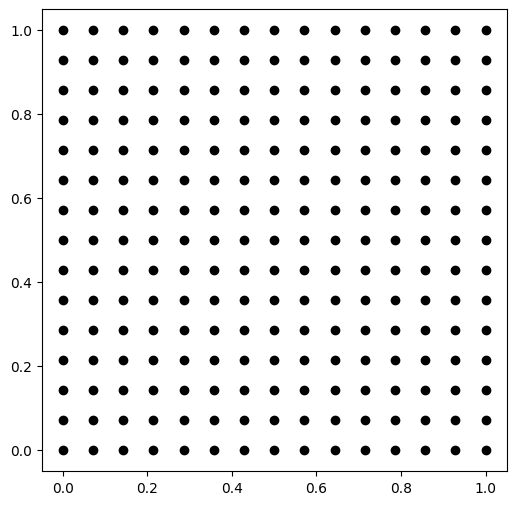

In [23]:
n=15
x = np.linspace(0.0, 1.0, n)
y = np.linspace(0.0, 1.0, n)
X, Y = np.meshgrid(x, y, indexing='ij')
plt.figure(figsize=(6,6))
plt.scatter(X.ravel(), Y.ravel(), c='black')

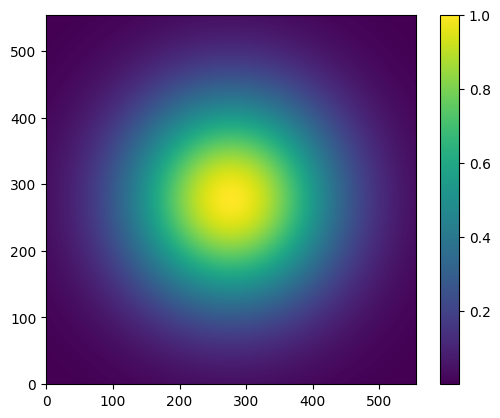

In [32]:
import numpy as np

def center_gaussian_kernel(n, sigma=0.1):

    x = np.linspace(0.0, 1.0, n)
    y = np.linspace(0.0, 1.0, n)
    X, Y = np.meshgrid(x, y, indexing='ij')
    K = np.exp(-((X - 0.5)**2 + (Y - 0.5)**2) / (2 * sigma**2))

    return K

plt.imshow(center_gaussian_kernel(555, sigma=0.2), origin='lower')
plt.colorbar()

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def rbf_kernel_torus(n, length):
    # coordinates (r,c)
    X = np.array([(r, c) for r in range(n) for c in range(n)], dtype=np.int32)
    dr = np.abs(X[:, None, 0] - X[None, :, 0])
    dc = np.abs(X[:, None, 1] - X[None, :, 1])
    dr = np.minimum(dr, n - dr)   # wrap-around on the torus
    dc = np.minimum(dc, n - dc)
    D2 = dr*dr + dc*dc
    return np.exp(-D2 / (2.0 * length * length))

def center_node_kernel(n=25, sigma=1.0, num_walks=400, p_term=0.2, seed=0, gamma=1.0):
    K_true = exact_diffusion_kernel(n, sigma, gamma)
    K_hat  = kernel_from_signatures(n, num_walks=num_walks, p_term=p_term, sigma=sigma, seed=seed)
    # K_rbf  = rbf_kernel_grid(n, length=sigma/2)
    K_rbf = rbf_kernel_torus(n, length=sigma/2)

    center_idx = (n // 2) * n + (n // 2)

    k_true = K_true[center_idx].reshape(n, n)
    k_hat  = K_hat[center_idx].reshape(n, n)
    k_rbf  = K_rbf[center_idx].reshape(n, n)
    
    # normalize for visualization
    k_true = k_true / (k_true.max() + 1e-12)
    k_hat  = k_hat  / (k_hat.max()  + 1e-12)
    k_rbf  = k_rbf  / (k_rbf.max()  + 1e-12)

    vmin = min(k_true.min(), k_hat.min(), k_rbf.min())
    vmax = max(k_true.max(), k_hat.max(), k_rbf.max())

    plt.figure(figsize=(15, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(k_true, origin="lower")
    plt.title("True diffusion kernel\n(center node)")
    plt.colorbar()

    plt.subplot(1, 3, 2)
    plt.imshow(k_hat, origin="lower")
    plt.title("g-GRF approximation\n(center node)")
    plt.colorbar()

    plt.subplot(1, 3, 3)
    plt.imshow(k_rbf, origin="lower")
    plt.title("Gaussian RBF\n(center node)")
    plt.colorbar()

    plt.tight_layout()
    plt.show()

    return k_true, k_hat, k_rbf, K_true, K_hat, K_rbf

# k_true, k_hat, k_rbf, K_true, K_hat, K_rbf = center_node_kernel(n=25, sigma=5., num_walks=1000, p_term=0.1, seed=346511053, gamma=1.)

4
8
16
32
64


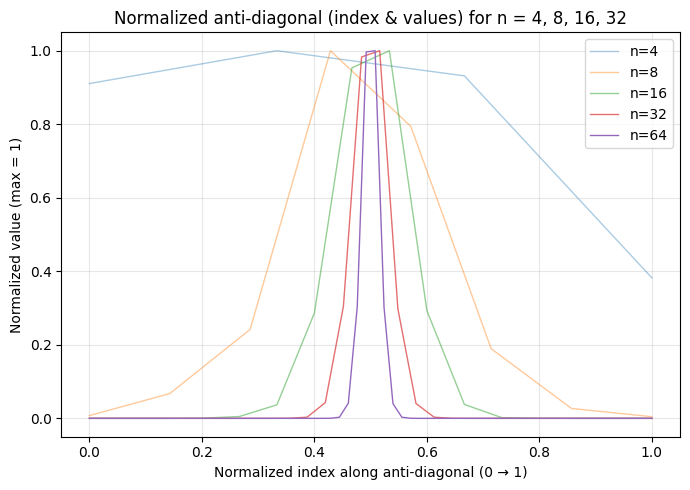

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

Ns = [4, 8, 16, 32, 64]

plt.figure(figsize=(7, 5))

# tqdm for progress bar
for n in Ns:
    A = generate_signature_vector_diffusion_sym(
        n=n, sigma=n/2., source=(n//2, n//2),
        num_walks=(n//2) ** 4, p_term=0.01, gamma=1.0, seed=346511053
    ).reshape(n, n)

    anti = np.diag(np.fliplr(A))            # anti-diagonal (top-right -> bottom-left)
    y = anti / anti.max() if anti.max() else anti  # normalize values to [0,1]
    x = np.linspace(0.0, 1.0, n)            # normalize index to [0,1]

    plt.plot(x, y, lw=1, label=f"n={n}", alpha=(n+max(Ns)/2)/(1.5*max(Ns)))

plt.xlabel('Normalized index along anti-diagonal (0 → 1)')
plt.ylabel('Normalized value (max = 1)')
plt.title('Normalized anti-diagonal (index & values) for n = 4, 8, 16, 32')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


Generating signature vector N=32: 100%|██████████| 100000/100000 [00:15<00:00, 6526.02it/s]


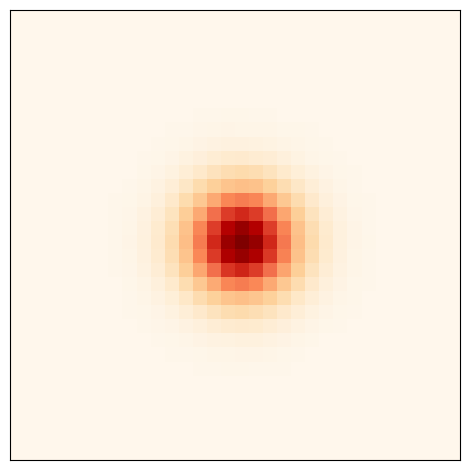

In [ ]:
import matplotlib.colors as mcolors
# Original colormap
cmap = plt.get_cmap('OrRd')
cmap.set_under('white')

plt.set_cmap(cmap)
n = 32
# plt.imshow(generate_signature_vector_diffusion_sym(n=n, sigma=n / 4., source=(n // 4, n * 3 // 4 - 1), num_walks=100000, p_term=0.1, gamma=1.0, seed=346511053).reshape(n,n), cmap=cmap, vmin=0.1)
plt.imshow(generate_signature_vector_diffusion_sym(n=n, sigma=n / 4., source=(n // 2, n // 2), num_walks=100000, p_term=0.01, gamma=1.0, seed=346511053).reshape(n,n), cmap=cmap)
# show actual gaussian
# plt.imshow(rbf_kernel_torus(n, length=(n/2./2.0))[n*(n//4)+n*3//4].reshape(n, n), cmap=cmap)

# add x ticks and y ticks at integer locations
# plt.xticks(np.arange(0, n, 1))
# plt.yticks(np.arange(0, n, 1))
# remove labels
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
# remove ticks
plt.gca().tick_params(length=0)
# add very light grid lines at very fine linewidth
# plt.grid(color='white', linestyle='-', alpha=0.25)
plt.tight_layout()
# plt.savefig(f"signature_vector{n}.png", bbox_inches="tight", dpi=300)
# remove border
# plt.gca().spines[:].set_visible(False)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(128, 128))

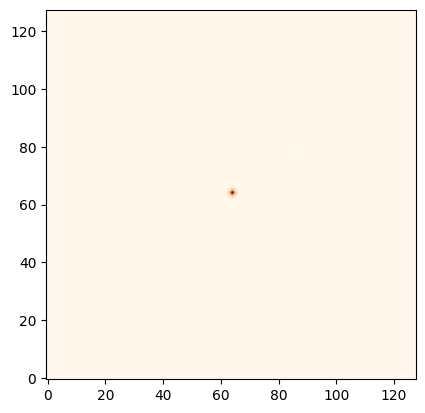

In [ ]:
# g(w, z) = [(2 / pi)^(d/4)] * exp(-||w-z||^2)
def signature_vector_choro(n, plot=False):
    # coordinates (r,c)
    X = np.array([(r, c) for r in range(n) for c in range(n)], dtype=np.int32)
    dr = np.abs(X[:, None, 0] - X[None, :, 0])
    dc = np.abs(X[:, None, 1] - X[None, :, 1])
    dr = np.minimum(dr, n - dr)   # wrap-around on the torus
    dc = np.minimum(dc, n - dc)
    D2 = dr*dr + dc*dc
    # return np.exp(-D2 / (2.0 * length * length))
    if plot:
        plt.imshow((2 / np.pi) ** (2 / 4) * np.exp(-D2)[n * (n // 2) + n // 2, :].reshape(n, n), origin="lower")
    return (2 / np.pi) ** (2 / 4) * np.exp(-D2)[n * (n // 2) + n // 2, :].reshape(n, n)

signature_vector_choro(128, plot=True)

In [6]:
# g(w, z) = [(2 / pi)^(d/4)] * exp(-||w-z||^2)
def signature_vector_dwip(n):
    # coordinates (r,c)
    X = np.array([(r, c) for r in range(n) for c in range(n)], dtype=np.int32)
    dr = np.abs(X[:, None, 0] - X[None, :, 0])
    dc = np.abs(X[:, None, 1] - X[None, :, 1])
    dr = np.minimum(dr, n - dr)   # wrap-around on the torus
    dc = np.minimum(dc, n - dc)
    D2 = dr*dr + dc*dc
    return 1 / (2 * np.pi) * np.exp(-D2 / (2))[n * (n // 2) + n // 2, :].reshape(n, n)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(128, 128))

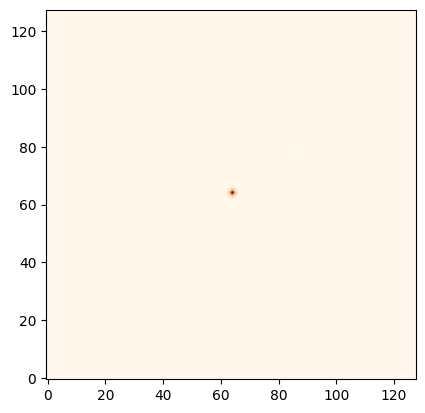

In [14]:
signature_vector_choro_center(128, plot=True)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(128, 128))

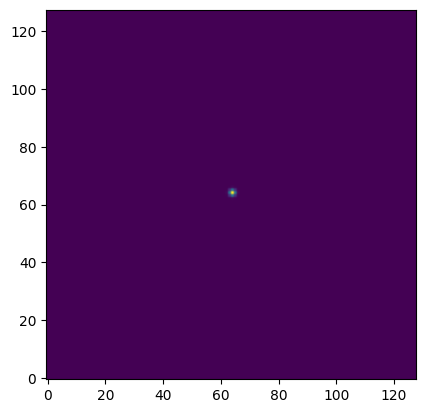

In [16]:
def signature_vector_choro_center(n, sigma=1., plot=False):
    """
    Center signature vector using your 'choro' normalization:
    sqrt(2/pi) * exp(- (dr^2 + dc^2)).
    Returns an (n, n) array.
    """
    r0 = c0 = n // 2
    dr = _wrap_deltas(n, r0)                 # shape (n,)
    dc = _wrap_deltas(n, c0)                 # shape (n,)
    # separability: exp(-D2) = exp(-dr^2) * exp(-dc^2)
    sig = (2/(1*np.pi))**0.5 * np.outer(np.exp(-dr**2/(sigma**2)), np.exp(-dc**2/(sigma**2)))
    if plot:
        plt.imshow(sig, origin="lower")
    return sig

signature_vector_choro_center(128, sigma=1., plot=True)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(128, 128))

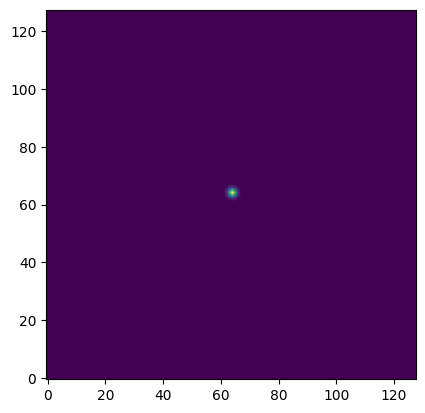

In [5]:
signature_vector_dwip_center(128, sigma=1., plot=True)

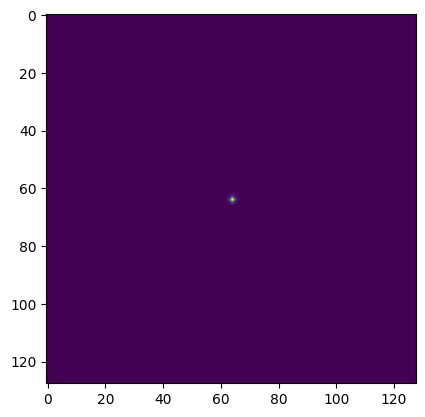

In [10]:
plt.imshow(signature_vector)

array([[2.05232615e-56, 6.70908982e-50, 2.96819119e-44, 1.77717900e-39,
        1.44006306e-35, 1.57922090e-32, 2.34377162e-30, 4.70759115e-29,
        1.27965595e-28, 4.70759115e-29, 2.34377162e-30, 1.57922090e-32,
        1.44006306e-35, 1.77717900e-39, 2.96819119e-44, 6.70908982e-50],
       [6.70908982e-50, 2.19321312e-43, 9.70306855e-38, 5.80962902e-33,
        4.70759115e-29, 5.16250055e-26, 7.66183016e-24, 1.53891973e-22,
        4.18321752e-22, 1.53891973e-22, 7.66183016e-24, 5.16250055e-26,
        4.70759115e-29, 5.80962902e-33, 9.70306855e-38, 2.19321312e-43],
       [2.96819119e-44, 9.70306855e-38, 4.29276747e-32, 2.57025768e-27,
        2.08270137e-23, 2.28395938e-20, 3.38969627e-18, 6.80838696e-17,
        1.85071145e-16, 6.80838696e-17, 3.38969627e-18, 2.28395938e-20,
        2.08270137e-23, 2.57025768e-27, 4.29276747e-32, 9.70306855e-38],
       [1.77717900e-39, 5.80962902e-33, 2.57025768e-27, 1.53891973e-22,
        1.24699957e-18, 1.36750108e-15, 2.02955155e-13, 4.076

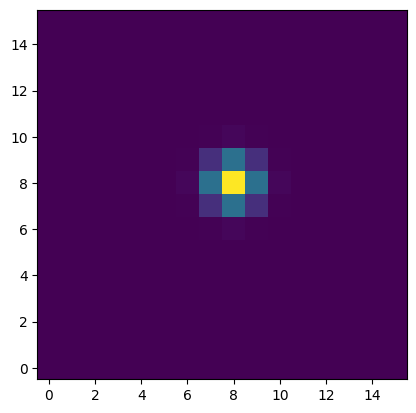

In [8]:
signature_vector_choro_center(16, sigma=1., plot=True)

Generating signature vector N=128: 100%|██████████| 1600000/1600000 [05:24<00:00, 4925.91it/s]


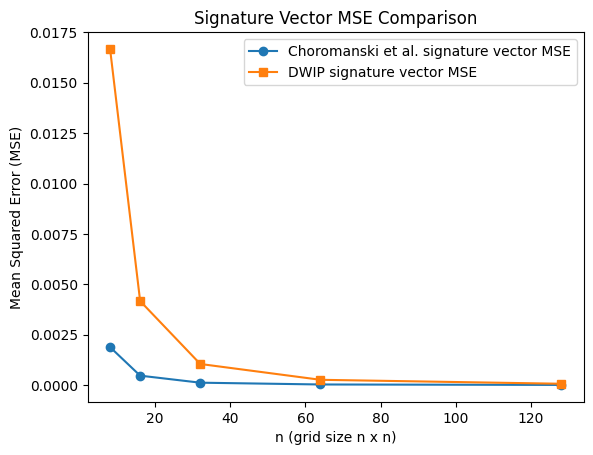

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def _wrap_deltas(n, i0):
    """Minimal torus distance from index vector 0..n-1 to i0."""
    idx = np.arange(n)
    d = np.abs(idx - i0)
    return np.minimum(d, n - d)

def signature_vector_choro_center(n, sigma=1., plot=False):
    """
    Center signature vector using your 'choro' normalization:
    sqrt(2/pi) * exp(- (dr^2 + dc^2)).
    Returns an (n, n) array.
    """
    r0 = c0 = n // 2
    dr = _wrap_deltas(n, r0)                 # shape (n,)
    dc = _wrap_deltas(n, c0)                 # shape (n,)
    # separability: exp(-D2) = exp(-dr^2) * exp(-dc^2)
    sig = (2/np.pi)**0.5 * np.outer(np.exp(-dr**2/(2*sigma**2)), np.exp(-dc**2/(2*sigma**2)))
    if plot:
        plt.imshow(sig, origin="lower")
    return sig

def signature_vector_dwip_center(n, sigma=1., plot=False):
    """
    Center signature vector using your 'dwip' normalization:
    (1 / (2*pi)) * exp(- (dr^2 + dc^2) / 2).
    Returns an (n, n) array.
    """
    r0 = c0 = n // 2
    dr = _wrap_deltas(n, r0)
    dc = _wrap_deltas(n, c0)
    sig = (1/(2*np.pi*sigma**2)) * np.outer(np.exp(-dr**2/(2*sigma**2)), np.exp(-dc**2/(2*sigma**2)))
    if plot:
        plt.imshow(sig, origin="lower")
    return sig

# compute mean squared error between signature vectors
def mse_signature_vectors(n, sv1, sv2):
    sv1_vec = sv1.reshape(-1)
    sv2_vec = sv2.reshape(-1)
    return np.mean((sv1_vec - sv2_vec) ** 2)
mses_choro = []
mses_dwip = []
Ns = [8, 16, 32, 64, 128]
reps_list = [10000, 40000, 100000, 400000, 1600000]
for reps, n in zip(reps_list, Ns):
    sigma = 1.
    signature_vector = generate_signature_vector_diffusion_sym(n=n, sigma=sigma, source=(n // 2, n // 2), num_walks=reps, p_term=0.01, gamma=1.0, seed=346511053).reshape(n,n)
    mses_choro.append(mse_signature_vectors(n, signature_vector, signature_vector_choro_center(n,sigma=sigma)))
    mses_dwip.append(mse_signature_vectors(n, signature_vector, signature_vector_dwip_center(n,sigma=sigma)))
plt.plot(Ns, mses_choro, marker='o', label='Choromanski et al. signature vector MSE')
plt.plot(Ns, mses_dwip, marker='s', label='DWIP signature vector MSE')
plt.xlabel('n (grid size n x n)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Signature Vector MSE Comparison')
plt.legend()

In [10]:
# show table of mses
print("n\tMSE Choro\tMSE DWIP")
for i in range(len(Ns)):
    print(f"{Ns[i]}\t{mses_choro[i]:.6f}\t{mses_dwip[i]:.6f}")

n	MSE Choro	MSE DWIP
8	0.001882	0.016678
16	0.000471	0.004169
32	0.000118	0.001042
64	0.000029	0.000261
128	0.000007	0.000065


Generating signature vector N=15: 100%|██████████| 1000/1000 [00:00<00:00, 71301.39it/s]


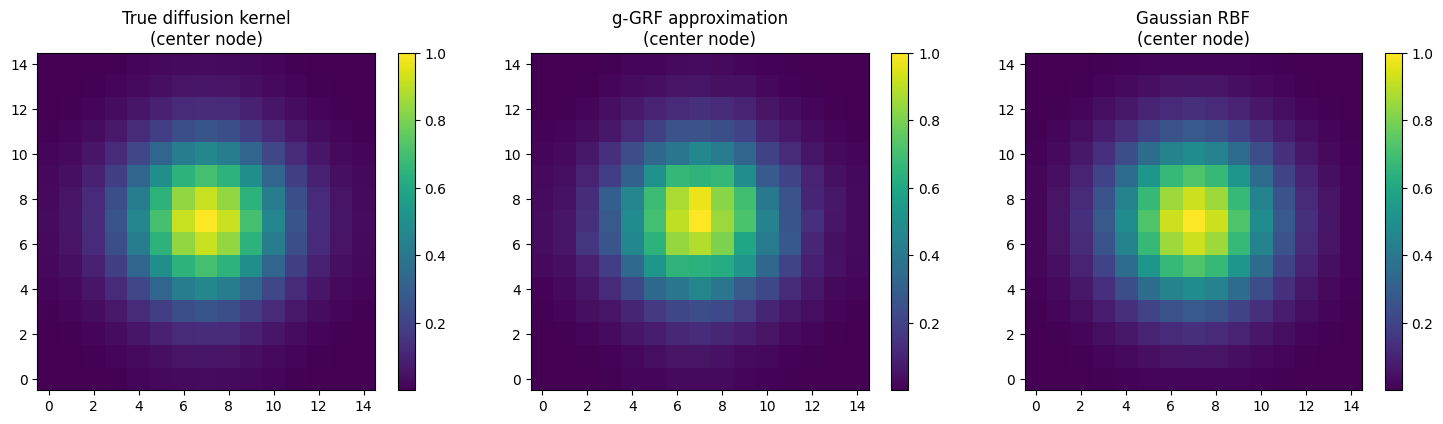

In [7]:
k_true, k_hat, k_rbf, K_true, K_hat, K_rbf = center_node_kernel(n=15, sigma=5., num_walks=1000, p_term=0.1, seed=346511053, gamma=1.)

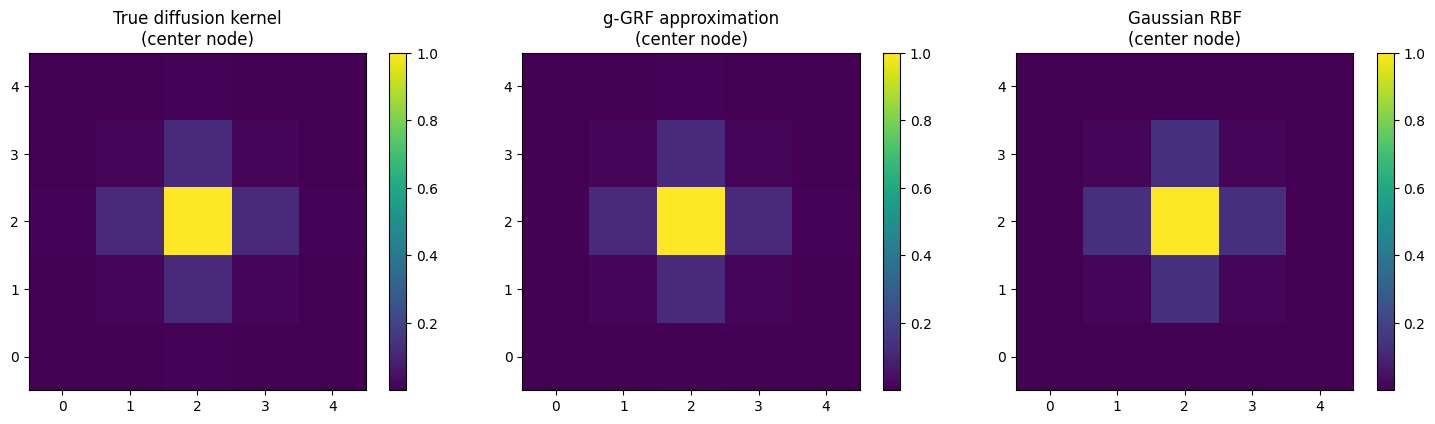

In [14]:
k_true, k_hat, k_rbf, K_true, K_hat, K_rbf = center_node_kernel(n=5, sigma=1., num_walks=1000, p_term=0.1, seed=346511053, gamma=1.)

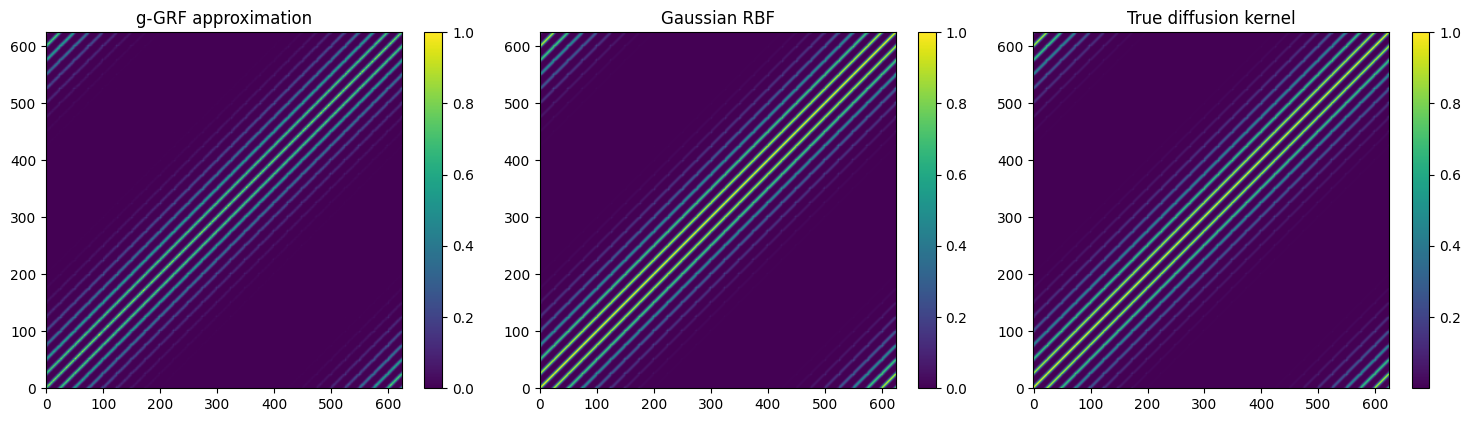

In [9]:
# plot K_hat, K_rbf, K_true
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.imshow(K_hat / (K_hat.max()), origin="lower")
plt.title("g-GRF approximation")
plt.colorbar()
plt.subplot(1, 3, 2)               
plt.imshow(K_rbf, origin="lower")
plt.title("Gaussian RBF")
plt.colorbar()
plt.subplot(1, 3, 3)
plt.imshow(K_true / (K_true.max()), origin="lower")
plt.title("True diffusion kernel")
plt.colorbar()
plt.tight_layout()

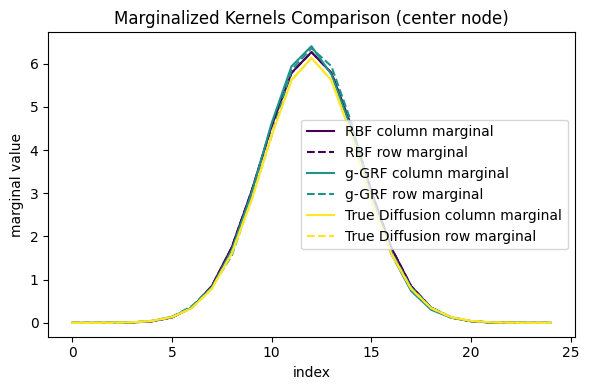

In [48]:
# plot_marginalized(k_rbf, title="Marginalized RBF Kernel (center node)")#, savepath="rbf_marginals.png")
# plot_marginalized(k_hat, title="Marginalized g-GRF Kernel (center node)")#, savepath="grf_marginals.png")
# plot_marginalized(k_true, title="Marginalized True Diffusion Kernel (center node)")#, savepath="true_diffusion_marginals.png")
plot_all_marginalized([k_rbf, k_hat, k_true], ["RBF", "g-GRF", "True Diffusion"], title="Marginalized Kernels Comparison (center node)")#, savepath="all_marginals.png")

In [ ]:
n = 25
num_walks = 1000
p_term = 0.01
gamma = 0.95

signature_vectors = [[[] for _ in range(n)] for _ in range(n)]
for i in range(n):
    for j in range(n):
        signature_vectors[i][j] = generate_signature_vector(n=n, source=(i, j), num_walks=num_walks, p_term=p_term, gamma=gamma)

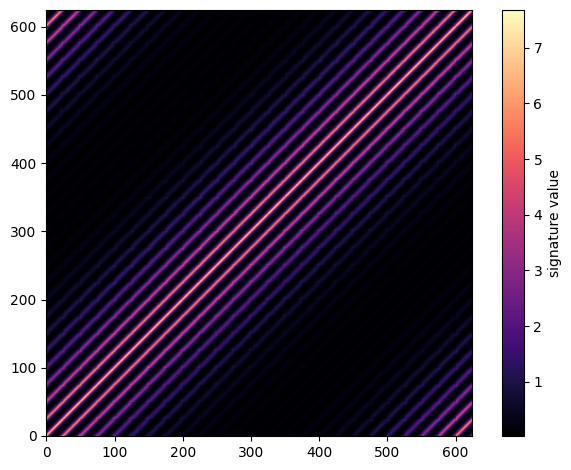

In [31]:
kernel_matrix = np.zeros((n*n, n*n), dtype=np.float64)
for i in range(n):
    for i_ in range(n):
        for j in range(n):
            for j_ in range(n):
                kernel_matrix[i*n + i_, j*n + j_] = np.multiply(signature_vectors[j][j_], signature_vectors[i][i_]).sum()
plt.set_cmap("magma")
plt.imshow(kernel_matrix, origin="lower")
plt.colorbar(label="signature value")
plt.tight_layout()

In [ ]:
num_walks = 1000
p_term = 0.01
gamma = 0.95
ns = (6,8,10,12,14,16)
mses = {n: [] for n in ns}
Ns = []
reps = 10

for n in ns:
    for _rep in range(reps):    
        signature_vectors = [[[] for _ in range(n)] for _ in range(n)]
        for i in range(n):
            for j in range(n):
                signature_vectors[i][j] = generate_signature_vector(n=n, source=(i, j), num_walks=num_walks, p_term=p_term, gamma=gamma)

        kernel_matrix = np.zeros((n*n, n*n), dtype=np.float64)
        for i in range(n):
            for i_ in range(n):
                for j in range(n):
                    for j_ in range(n):
                        kernel_matrix[i*n + i_, j*n + j_] = np.multiply(signature_vectors[j][j_], signature_vectors[i][i_]).sum()
                        
        mses[n].append(mse(kernel_matrix, rbf_kernel_grid(n, length=4.)))
    Ns.append(n*n)

plt.figure(figsize=(6,4))
plt.plot(Ns, mses, marker="s", label="RBF vs Kernel without modulation")
plt.xlabel("number of nodes N"); plt.ylabel("MSE")
plt.title("Diffusion kernel approximation vs raw Gaussian"); plt.legend(); plt.tight_layout()

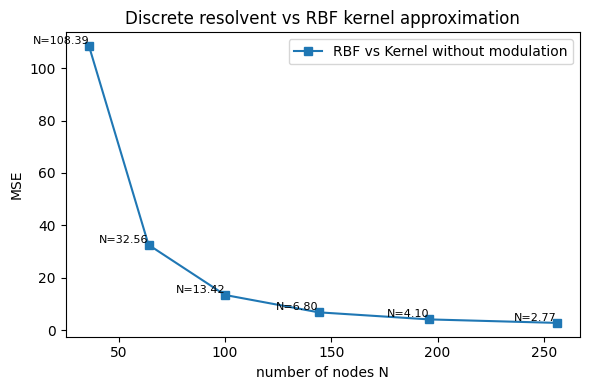

In [41]:
# included with text
plt.figure(figsize=(6,4))
plt.plot(Ns, mses, marker="s", label="RBF vs Kernel without modulation")
plt.xlabel("number of nodes N"); plt.ylabel("MSE")
plt.title("Discrete resolvent vs RBF kernel approximation")
# include text at each point
plt.text(Ns[0], mses[0], f"N={mses[0]:.2f}", fontsize=8, ha='right', va='bottom')
plt.text(Ns[1], mses[1], f"N={mses[1]:.2f}", fontsize=8, ha='right', va='bottom')
plt.text(Ns[2], mses[2], f"N={mses[2]:.2f}", fontsize=8, ha='right', va='bottom')
plt.text(Ns[3], mses[3], f"N={mses[3]:.2f}", fontsize=8, ha='right', va='bottom')
plt.text(Ns[4], mses[4], f"N={mses[4]:.2f}", fontsize=8, ha='right', va='bottom')
plt.text(Ns[5], mses[5], f"N={mses[5]:.2f}", fontsize=8, ha='right', va='bottom')
plt.legend(); plt.tight_layout()

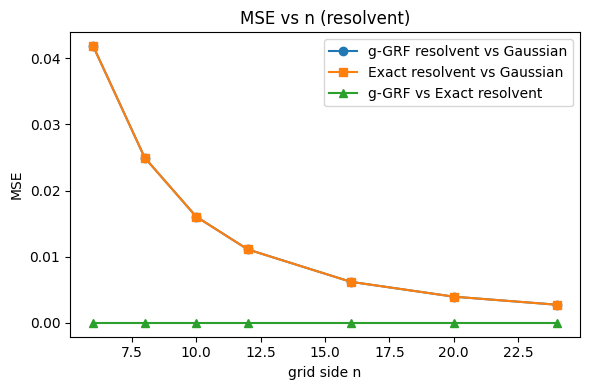

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def torus_normalized_adjacency(n):
    I = np.eye(n)
    S = np.roll(I, 1, axis=0) + np.roll(I, -1, axis=0)     # 1D ring
    A = np.kron(S, I) + np.kron(I, S)                      # 2D grid (torus)
    return A / 4.0                                         # degree-normalized

def rbf_kernel_grid(n, length=1.0):
    X = np.stack(np.meshgrid(np.arange(n), np.arange(n), indexing="ij"), axis=-1).reshape(-1,2)
    D2 = ((X[:,None,:] - X[None,:,:])**2).sum(axis=-1)
    return np.exp(-D2/(2.0*length*length))

def resolvent_kernel_grf(n, gamma=0.9, max_terms=512, tol=1e-12):
    W = torus_normalized_adjacency(n)
    N = n*n
    Phi = np.eye(N)
    P = np.eye(N)
    fk = 1.0
    for k in range(1, max_terms+1):
        P = P @ W
        fk *= (gamma/2.0) * (2*k-1)/k
        if abs(fk) < tol: break
        Phi += fk * P
    return Phi @ Phi.T

def resolvent_kernel_exact(n, gamma=0.9):                  # optional exact check
    W = torus_normalized_adjacency(n)
    N = n*n
    I = np.eye(N)
    return np.linalg.solve(I - gamma*W, I)

def mse(A, B): return np.mean((A - B)**2)

def mse_vs_n_resolvent(ns, gamma=0.9, rbf_length=1.0, max_terms=512, tol=1e-12, compare_exact=False):
    mses_grf_vs_rbf, mses_exact_vs_rbf, mses_grf_vs_exact = [], [], []
    for n in ns:
        K_grf = resolvent_kernel_grf(n, gamma=gamma, max_terms=max_terms, tol=tol)
        K_rbf = rbf_kernel_grid(n, length=rbf_length)
        mses_grf_vs_rbf.append(mse(K_grf, K_rbf))
        if compare_exact:
            K_exact = resolvent_kernel_exact(n, gamma=gamma)
            mses_exact_vs_rbf.append(mse(K_exact, K_rbf))
            mses_grf_vs_exact.append(mse(K_grf, K_exact))
    plt.figure(figsize=(6,4))
    plt.plot(ns, mses_grf_vs_rbf, marker="o", label="g-GRF resolvent vs Gaussian")
    if compare_exact:
        plt.plot(ns, mses_exact_vs_rbf, marker="s", label="Exact resolvent vs Gaussian")
        plt.plot(ns, mses_grf_vs_exact, marker="^", label="g-GRF vs Exact resolvent")
    plt.xlabel("grid side n"); plt.ylabel("MSE"); plt.title("MSE vs n (resolvent)")
    plt.legend(); plt.tight_layout()
    return mses_grf_vs_rbf, mses_exact_vs_rbf, mses_grf_vs_exact

# Example: sweep n and plot MSE
ns = [6, 8, 10, 12, 16, 20, 24]
_ = mse_vs_n_resolvent(ns, gamma=0.9, rbf_length=1.5, max_terms=400, tol=1e-13, compare_exact=True)

## Parallelized Signature Vector Diffusion Kernel

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from concurrent.futures import ProcessPoolExecutor
from functools import partial

def neighbors(r, c, n):
    return [((r-1) % n, c % n), ((r+1) % n, c % n), (r % n, (c-1) % n), (r % n, (c+1) % n)]

def generate_signature_vector_diffusion_sym(n=10, source=(0,0), num_walks=400, p_term=0.2, gamma=1.0, sigma=1.0, seed=0):
    rng = np.random.default_rng(seed)
    v = np.zeros((n,n), dtype=np.float64)
    rr, cc = source
    s = (sigma*sigma)/2.0
    for _ in range(num_walks):
        r, c = rr, cc
        load = 1.0
        k = 0
        fk = 1.0
        while True:
            v[r,c] += load*fk
            k += 1
            nbrs = neighbors(r,c,n); dv = 4
            wr, wc = nbrs[rng.integers(dv)]; dw = 4
            p = 1.0/dv
            u = gamma/np.sqrt(dv*dw)
            load *= u/(p*(1.0-p_term))
            r, c = wr, wc
            fk *= s/k
            if rng.random() < p_term: break
    return (v/num_walks).reshape(-1)

def exact_diffusion_kernel(n, sigma=1.0, gamma=1.0):
    N = n*n
    U = np.zeros((N,N), dtype=np.float64)
    for r in range(n):
        for c in range(n):
            i = r*n + c
            for nr, nc in neighbors(r,c,n):
                j = nr*n + nc
                U[i,j] = gamma/2.0
    L = np.eye(N) - U
    w, Q = np.linalg.eigh(L)
    return Q @ np.diag(np.exp(-0.5*(sigma**2)*w)) @ Q.T

def kernel_from_signatures(n, num_walks=400, p_term=0.2, sigma=1.0, gamma=1.0, seed=0):
    N = n*n
    Phi = np.zeros((N,N), dtype=np.float64)
    s = 0
    for r in range(n):
        for c in range(n):
            Phi[s,:] = generate_signature_vector_diffusion_sym(n, (r,c), num_walks, p_term, gamma, sigma, seed+s)
            s += 1
    return np.exp(-0.5*sigma*sigma) * (Phi @ Phi.T)

def rbf_kernel_grid(n, length=1.0):
    X = np.array([(r,c) for r in range(n) for c in range(n)], dtype=np.float64)
    D2 = np.sum((X[:,None,:]-X[None,:,:])**2, axis=2)
    return np.exp(-D2/(2.0*length*length))

def mse(A,B): return np.mean((A-B)**2)

# -----------------------------------
# helpers for parallelizing replications
# -----------------------------------

# per-process globals set once via initializer (avoid re-pickling per task)
_K_TRUE = None
_K_RBF = None
from itertools import repeat

def _khat_for_rep(n, num_walks, p_term, sigma, gamma, seed):
    # top-level so it's picklable by spawn
    return kernel_from_signatures(n, num_walks, p_term, sigma, gamma, seed)

def _init_pool(K_true, K_rbf):
    """Initializer to cache constant matrices in each worker."""
    global _K_TRUE, _K_RBF
    _K_TRUE = K_true
    _K_RBF = K_rbf

def _one_rep(seed_i, n, num_walks, p_term, sigma, gamma):
    """Compute a single replication's MSEs using cached exact/RBF kernels."""
    K_hat = kernel_from_signatures(n, num_walks, p_term, sigma, gamma, seed=seed_i)
    # Use cached per-process kernels (fall back if not set)
    K_true = _K_TRUE if (_K_TRUE is not None and _K_TRUE.shape[0] == n*n) else exact_diffusion_kernel(n, sigma, gamma)
    K_rbf = _K_RBF  if (_K_RBF  is not None and _K_RBF.shape[0]  == n*n) else rbf_kernel_grid(n, length=sigma)
    return mse(K_hat, K_true), mse(K_hat, K_rbf)

# ----------------------------
# parallelized run_curve
# ----------------------------
import os
from concurrent.futures import ProcessPoolExecutor

def run_curve_parallel(ns=(10,12,14,16),
                       num_walks=300, p_term=0.01,
                       sigma=4.0, gamma=.95,
                       seed=0, reps=100,
                       max_workers=None):
    """
    Parallelizes over 'reps' for each n.
    Computes K_true and K_rbf once per n in the parent.
    """
    max_workers = max_workers or (os.cpu_count() or 1)

    # lists of length `reps`, each holding a list over |ns|
    mses_rf  = [[] for _ in range(reps)]
    mses_rbf = [[] for _ in range(reps)]
    mses_true_vs_exact_kernel = [[] for _ in range(reps)]
    Ns = []

    for n in ns:
        print(n)
        # Precompute once per n (deterministic)
        K_true = exact_diffusion_kernel(n, sigma, gamma)
        K_rbf  = rbf_kernel_grid(n, length=sigma)

        seeds = [seed + i for i in range(reps)]

        # Dispatch replications in parallel; map preserves order
        # so i-th result corresponds to seed+i
        with ProcessPoolExecutor(max_workers=max_workers) as ex:
            # chunksize=1 is fine for moderate reps; tune if reps is very large
            for i, K_hat in enumerate(
                ex.map(_khat_for_rep,
                       repeat(n),
                       repeat(num_walks),
                       repeat(p_term),
                       repeat(sigma),
                       repeat(gamma),
                       seeds,
                       chunksize=1)
            ):
                mses_rf[i].append(mse(K_hat, K_true))
                mses_rbf[i].append(mse(K_hat, K_rbf))
                # this one doesn't depend on the replication; append once
                if len(mses_true_vs_exact_kernel[i]) < len(Ns) + 1:
                    mses_true_vs_exact_kernel[i].append(mse(K_true, K_rbf))

        Ns.append(n*n)

    return Ns, mses_rf, mses_rbf, mses_true_vs_exact_kernel

# Example usage:
Ns, mses_rf, mses_rbf, mses_true_vs_exact_kernel = run_curve_parallel(max_workers=8)

## Training

In [7]:
# ============================================================
# End-to-end: Learn f(x, ω) ≈ φ_t(x)[ω] on S^2
#  - Build sphere graph + g-GRF signatures (diffusion modulation α_k = t^k/k!)
#  - Dataset: ([x_j || ω_{j,i}], target = φ_t(x_j)[ω_{j,i}])
#  - Train NN: continuous features (coords + geodesic). Optionally add ID embeddings.
# ============================================================

import math
import numpy as np
from typing import Dict, List, Tuple, Any

# =============== CONFIG ===============
CFG = dict(
    N=600,                # sphere sample size
    k=8,                  # kNN
    num_starts=200,       # number of x_j
    start_mode="farthest",# or "random"
    n_walks=2000,         # by default = N (per start)
    phalt=0.01,           # termination prob in Alg. 1
    t=16/2,                # diffusion scale (τ = t) # \sigma^2/2
    seed=7,

    subsample_per_start=None,  # None = use all ω; or int (e.g., 300)

    # model/training
    use_continuous_only=True,  # True: only coords+geodesic (continuous RF); False: + ID embeddings
    d_emb=64,
    hidden=128,
    batch_size=1024,
    lr=1e-3,
    epochs=50,
    val_frac=0.2,
    torch_seed=0,
)
# ======================================

# ----------------------------
# Sphere + graph + g-GRF (Alg. 1) signatures
# ----------------------------

def fibonacci_sphere(n: int) -> np.ndarray:
    i = np.arange(n, dtype=float)
    phi = np.pi * (3.0 - np.sqrt(5.0))
    y = 1.0 - 2.0 * (i + 0.5) / n
    r = np.sqrt(np.maximum(0.0, 1.0 - y * y))
    theta = phi * (i + 0.5)
    x = np.cos(theta) * r
    z = np.sin(theta) * r
    return np.column_stack((x, y, z))

def build_knn_graph(X: np.ndarray, k: int = 16):
    """Symmetric kNN with Gaussian weights; return W_raw, Wf, neighbors, deg_unw, sigma^2."""
    N = X.shape[0]
    XXT = X @ X.T
    D2 = np.clip(2.0 - 2.0 * XXT, 0.0, None)  # chord^2 on S^2
    np.fill_diagonal(D2, np.inf)
    kth_sq = np.partition(D2, k, axis=1)[:, k]
    sigma2 = float(np.median(kth_sq))
    W = np.zeros((N, N), dtype=float)
    for i in range(N):
        nn = np.argpartition(D2[i], k)[:k]
        W[i, nn] = np.exp(-D2[i, nn] / sigma2)
    W = np.maximum(W, W.T)
    np.fill_diagonal(W, 0.0)
    deg = W.sum(axis=1)
    D_inv_sqrt = 1.0 / np.sqrt(deg + 1e-12)
    Wf = (D_inv_sqrt[:, None] * W) * D_inv_sqrt[None, :]
    A_unw = (W > 0).astype(np.int32)
    deg_unw = A_unw.sum(axis=1).astype(np.int32)
    neighbors = [np.flatnonzero(A_unw[i]).astype(np.int32) for i in range(N)]
    return W, Wf, neighbors, deg_unw, sigma2

def farthest_point_sample(coords: np.ndarray, m: int, seed: int = 0) -> np.ndarray:
    rng = np.random.default_rng(seed)
    N = coords.shape[0]
    start = int(rng.integers(0, N))
    sel = [start]
    d2 = np.sum((coords - coords[start])**2, axis=1)
    for _ in range(1, m):
        idx = int(np.argmax(d2))
        sel.append(idx)
        d2 = np.minimum(d2, np.sum((coords - coords[idx])**2, axis=1))
    return np.array(sel, dtype=int)

def precompute_alpha(tau: float, Kmax: int = 10000, eps: float = 1e-300) -> np.ndarray:
    """Diffusion modulation α_k = τ^k / k! via stable recurrence; α_0=1."""
    vals = [1.0]
    k = 1
    while k < Kmax:
        nxt = vals[-1] * (tau / k)
        if nxt < eps: break
        vals.append(nxt); k += 1
    return np.array(vals, dtype=float)

def build_ggrf_signatures_on_sphere(
    N: int, k: int, num_starts: int, start_mode: str,
    n_walks: int | None, phalt: float, tau: float, seed: int
) -> Dict[str, Any]:
    """
    Build signatures φ_t(x_j) using g-GRF Algorithm 1 with uniform-by-count neighbor sampling.
    Returns dict with:
      X (N,3), start_indices (J,), starts_xyz (J,3),
      phi (J, N), params {...}
    """
    rng = np.random.default_rng(seed)
    X = fibonacci_sphere(N)
    W_raw, Wf, neighbors, deg_unw, sigma2 = build_knn_graph(X, k=k)

    if start_mode == "farthest":
        start_indices = farthest_point_sample(X, num_starts, seed=seed)
    elif start_mode == "random":
        start_indices = rng.choice(N, size=num_starts, replace=False)
    else:
        raise ValueError("start_mode must be 'farthest' or 'random'")

    alpha = precompute_alpha(tau, Kmax=10000, eps=1e-300)
    def modulation(step: int) -> float:
        return float(alpha[step]) if step < alpha.shape[0] else 0.0

    if n_walks is None: n_walks = N

    phi = np.zeros((num_starts, N), dtype=float)

    def sample_feature(start_idx: int):
        vec = np.zeros(N, dtype=float)
        local_rng = np.random.default_rng(int(seed) * 1009 + int(start_idx))
        while vec.dtype == float:  # silly loop to scope variables (runs once)
            for _ in range(n_walks):
                u = int(start_idx)
                load = 1.0
                step = 0
                terminated = False
                while not terminated:
                    vec[u] += load * modulation(step)
                    step += 1
                    nbrs = neighbors[u]
                    if nbrs.size == 0: break
                    v = int(nbrs[local_rng.integers(0, nbrs.size)])
                    # Alg. 1 update (uniform-by-count neighbor sampling):
                    load *= (deg_unw[u] / (1.0 - phalt)) * float(Wf[u, v])
                    u = v
                    terminated = (local_rng.random() < phalt)
            break
        vec /= float(n_walks)
        return vec

    for j, s in enumerate(start_indices):
        phi[j] = sample_feature(int(s))

    return {
        "X": X,
        "start_indices": start_indices,
        "starts_xyz": X[start_indices],
        "phi": phi,
        "params": {
            "N": int(N), "k": int(k), "num_starts": int(num_starts),
            "start_mode": start_mode, "n_walks": int(n_walks),
            "phalt": float(phalt), "tau": float(tau), "sigma2": float(sigma2)
        }
    }

# ----------------------------
# Supervision: (x_j, ω_{j,i}) -> y_{j,i} = φ_t(x_j)[ω_{j,i}]
# ----------------------------

def make_node_pair_supervision(out: Dict[str, Any],
                               mode: str = "all", M_per_start: int | None = None,
                               seed: int = 123):
    """
    Build arrays: start_ids (M,), omega_ids (M,), targets (M,) and geometry arrays.
    If M_per_start is set with mode="random", uniformly subsample that many ω per start x_j.
    """
    X = out["X"]
    start_ids = out["start_indices"]
    phi = out["phi"]
    N = X.shape[0]
    rng = np.random.default_rng(seed)

    starts, omegas, targets = [], [], []
    for j, s in enumerate(start_ids):
        nodes = np.arange(N)
        if mode == "random" and (M_per_start is not None) and (M_per_start < N):
            nodes = rng.choice(N, size=M_per_start, replace=False)
        for i in nodes:
            starts.append(int(s))
            omegas.append(int(i))
            targets.append(float(phi[j, i]))

    starts = np.array(starts, dtype=np.int64)
    omegas = np.array(omegas, dtype=np.int64)
    targets = np.array(targets, dtype=np.float32)
    return {"starts": starts, "omegas": omegas, "targets": targets, "X": X, "N": N}

# ----------------------------
# PyTorch model (continuous RF by default)
# ----------------------------

def ensure_torch():
    try:
        import torch  # noqa: F401
        return True
    except Exception:
        print("PyTorch not found. Please install torch.")
        return False

if ensure_torch():
    import torch
    import torch.nn as nn
    from torch.utils.data import Dataset, DataLoader

    class NodePairDataset(Dataset):
        def __init__(self, sup: Dict[str, Any], use_continuous_only: bool = True):
            self.starts = sup["starts"]      # (M,)
            self.omegas = sup["omegas"]      # (M,)
            self.targets = sup["targets"]    # (M,)
            self.X = sup["X"]                # (N,3)
            self.use_cont = use_continuous_only
        def __len__(self): return len(self.targets)
        def __getitem__(self, idx):
            s = int(self.starts[idx]); o = int(self.omegas[idx])
            start_xyz = self.X[s].astype(np.float32)
            omega_xyz = self.X[o].astype(np.float32)
            dot = float(np.clip(np.dot(start_xyz, omega_xyz), -1.0, 1.0))
            geod = float(np.arccos(dot))
            ex = {
                "start": s, "omega": o,
                "start_xyz": start_xyz, "omega_xyz": omega_xyz,
                "geod": geod, "target": float(self.targets[idx])
            }
            return ex

    def collate(batch):
        import torch
        return {
            "start": torch.tensor([b["start"] for b in batch], dtype=torch.long),
            "omega": torch.tensor([b["omega"] for b in batch], dtype=torch.long),
            "start_xyz": torch.tensor([b["start_xyz"] for b in batch], dtype=torch.float32),
            "omega_xyz": torch.tensor([b["omega_xyz"] for b in batch], dtype=torch.float32),
            "geod": torch.tensor([b["geod"] for b in batch], dtype=torch.float32).unsqueeze(-1),
            "target": torch.tensor([b["target"] for b in batch], dtype=torch.float32),
        }

    class SignatureAtNodeRegressor(nn.Module):
        """
        f(x, ω): default uses ONLY coords + geodesic (continuous RF).
        If use_ids=True, adds ID embeddings for start and omega.
        """
        def __init__(self, num_nodes: int, x_coords: np.ndarray,
                     d_emb: int = 64, hidden: int = 128,
                     use_continuous_only: bool = True):
            super().__init__()
            self.register_buffer("Xcoords", torch.tensor(x_coords, dtype=torch.float32))  # (N,3)
            self.use_cont = use_continuous_only
            self.use_ids = not use_continuous_only
            if self.use_ids:
                self.start_emb = nn.Embedding(num_nodes, d_emb)
                self.omega_emb = nn.Embedding(num_nodes, d_emb)

            # inputs: geod (1), start_xyz (3), omega_xyz (3) -> 7 dims
            in_dim = 7
            if self.use_ids:
                in_dim += 2 * d_emb

            self.mlp = nn.Sequential(
                nn.Linear(in_dim, hidden), nn.ReLU(),
                nn.Linear(hidden, hidden), nn.ReLU(),
                nn.Linear(hidden, 1)
            )

        def forward(self, batch):
            s = batch["start"]; o = batch["omega"]; geod = batch["geod"]
            pieces = [batch["start_xyz"], batch["omega_xyz"], geod]
            if self.use_ids:
                s_emb = self.start_emb(s); o_emb = self.omega_emb(o)
                pieces = [s_emb, o_emb] + pieces
            x = torch.cat(pieces, dim=-1)
            return self.mlp(x).squeeze(-1)

    # ----------------------------
    # Training utilities
    # ----------------------------

    def split_indices(M, val_frac=0.2, seed=0):
        rng = np.random.default_rng(seed)
        idx = np.arange(M); rng.shuffle(idx)
        k = int(M * (1 - val_frac))
        return idx[:k], idx[k:]

    def train_model_node_pairs(
        sup: Dict[str, Any],
        batch_size=1024, epochs=8, lr=1e-3,
        d_emb=64, hidden=128, use_continuous_only=True, val_frac=0.2, seed=0
    ):
        import torch
        ds = NodePairDataset(sup, use_continuous_only=use_continuous_only)
        train_idx, val_idx = split_indices(len(ds), val_frac=val_frac, seed=seed)

        class Subset(torch.utils.data.Dataset):
            def __init__(self, base, idxs): self.base, self.idxs = base, idxs
            def __len__(self): return len(self.idxs)
            def __getitem__(self, i): return self.base[self.idxs[i]]

        tr_ds, va_ds = Subset(ds, train_idx), Subset(ds, val_idx)
        tr = DataLoader(tr_ds, batch_size=batch_size, shuffle=True, collate_fn=collate, drop_last=False)
        va = DataLoader(va_ds, batch_size=batch_size, shuffle=False, collate_fn=collate, drop_last=False)

        model = SignatureAtNodeRegressor(
            num_nodes=sup["N"], x_coords=sup["X"],
            d_emb=d_emb, hidden=hidden, use_continuous_only=use_continuous_only
        )
        torch.manual_seed(seed)
        opt = torch.optim.Adam(model.parameters(), lr=lr)
        loss_fn = torch.nn.MSELoss()

        def eval_loader(dl):
            model.eval()
            se, n = 0.0, 0
            with torch.no_grad():
                for batch in dl:
                    pred = model(batch); y = batch["target"]
                    se += torch.sum((pred - y)**2).item()
                    n += y.numel()
            return math.sqrt(se / n)

        for ep in range(1, epochs+1):
            model.train()
            for batch in tr:
                pred = model(batch); y = batch["target"]
                loss = loss_fn(pred, y)
                opt.zero_grad(); loss.backward(); opt.step()
            rmse_tr = eval_loader(tr)
            rmse_va = eval_loader(va)
            print(f"Epoch {ep:02d} | RMSE train: {rmse_tr:.6f} | RMSE val: {rmse_va:.6f}")
        return model

# ----------------------------
# Main: build data → train NN
# ----------------------------

def main(CFG):
    N, k = CFG["N"], CFG["k"]
    num_starts, start_mode = CFG["num_starts"], CFG["start_mode"]
    n_walks, phalt, t, seed = CFG["n_walks"], CFG["phalt"], CFG["t"], CFG["seed"]

    out = build_ggrf_signatures_on_sphere(
        N=N, k=k, num_starts=num_starts, start_mode=start_mode,
        n_walks=n_walks, phalt=phalt, tau=t, seed=seed
    )
    print("Built signatures:", {k: out["params"][k] for k in ["N","k","num_starts","n_walks","phalt","tau"]})

    sup = make_node_pair_supervision(
        out,
        mode=("all" if CFG["subsample_per_start"] is None else "random"),
        M_per_start=CFG["subsample_per_start"],
        seed=123
    )
    sup["N"] = out["params"]["N"]  # add for model ctor
    print("Dataset size:", len(sup["targets"]))

    if ensure_torch():
        model = train_model_node_pairs(
            sup,
            batch_size=CFG["batch_size"],
            epochs=CFG["epochs"],
            lr=CFG["lr"],
            d_emb=CFG["d_emb"],
            hidden=CFG["hidden"],
            use_continuous_only=CFG["use_continuous_only"],
            val_frac=CFG["val_frac"],
            seed=CFG["torch_seed"]
        )
    
    return out, model

if __name__ == "__main__":
    out, model = main(CFG)


Built signatures: {'N': 600, 'k': 8, 'num_starts': 200, 'n_walks': 2000, 'phalt': 0.01, 'tau': 8.0}
Dataset size: 120000
Epoch 01 | RMSE train: 9.929879 | RMSE val: 9.704520
Epoch 02 | RMSE train: 3.657593 | RMSE val: 3.582494
Epoch 03 | RMSE train: 1.854454 | RMSE val: 1.824852
Epoch 04 | RMSE train: 1.589167 | RMSE val: 1.570777
Epoch 05 | RMSE train: 1.459760 | RMSE val: 1.438603
Epoch 06 | RMSE train: 1.410466 | RMSE val: 1.389311
Epoch 07 | RMSE train: 1.404402 | RMSE val: 1.383201
Epoch 08 | RMSE train: 1.380220 | RMSE val: 1.359324
Epoch 09 | RMSE train: 1.370336 | RMSE val: 1.351717
Epoch 10 | RMSE train: 1.364602 | RMSE val: 1.349201
Epoch 11 | RMSE train: 1.349904 | RMSE val: 1.338099
Epoch 12 | RMSE train: 1.342534 | RMSE val: 1.331718
Epoch 13 | RMSE train: 1.337904 | RMSE val: 1.330476
Epoch 14 | RMSE train: 1.333171 | RMSE val: 1.328216
Epoch 15 | RMSE train: 1.327143 | RMSE val: 1.318343
Epoch 16 | RMSE train: 1.321833 | RMSE val: 1.311974
Epoch 17 | RMSE train: 1.327027

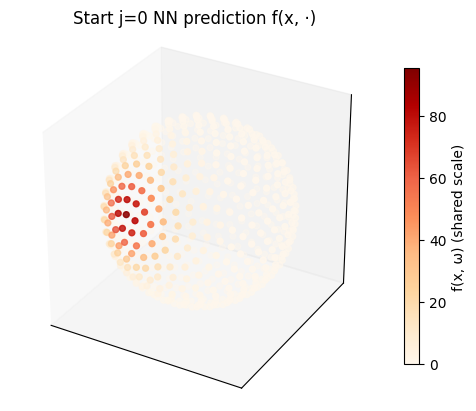

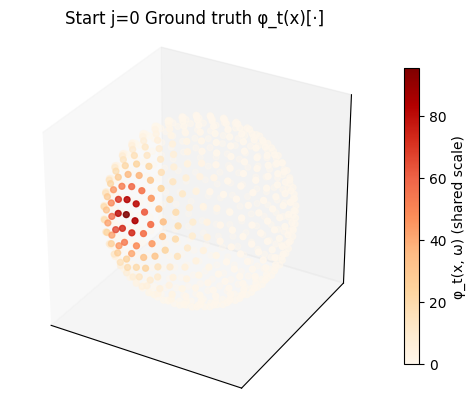

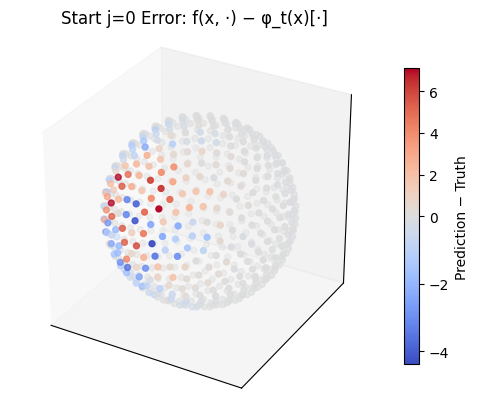

In [8]:
import numpy as np, torch, matplotlib.pyplot as plt
from matplotlib.colors import Normalize, TwoSlopeNorm
from matplotlib.cm import ScalarMappable

def plot_fx_field(model, X, start_indices, phi, j_star=0, title_prefix="",
                  share_norm=True,  # use same vmin/vmax for pred & truth
                  cmap_main="OrRd", cmap_err="coolwarm"):
    """
    Visualize f(x, ·), φ_t(x)[·], and error with colorbars.

    share_norm=True -> pred & truth use the SAME (vmin, vmax) from unnormalized values.
    If you want heat-kernel scale instead of φ_t, divide both arrays by exp(t) before plotting.
    """
    model.eval()
    device = next(model.parameters()).device
    N = X.shape[0]
    s = int(start_indices[j_star])
    start_xyz = X[s]
    omega_xyz = X
    dots = np.clip((omega_xyz * start_xyz).sum(axis=1), -1.0, 1.0)
    geod = np.arccos(dots)

    # batch with IDs + continuous feats (works for both model variants)
    batch = {
        "start": torch.full((N,), s, dtype=torch.long, device=device),
        "omega": torch.arange(N, dtype=torch.long, device=device),
        "start_xyz": torch.tensor(np.repeat(start_xyz[None,:], N, axis=0), dtype=torch.float32, device=device),
        "omega_xyz": torch.tensor(omega_xyz, dtype=torch.float32, device=device),
        "geod": torch.tensor(geod[:,None], dtype=torch.float32, device=device),
    }
    with torch.no_grad():
        f_pred = model(batch).detach().cpu().numpy()

    # ground truth row for this start
    j = int(np.where(start_indices == s)[0][0])
    phi_row = phi[j].astype(float)

    # ---- normalization choices ----
    if share_norm:
        vmin = min(f_pred.min(), phi_row.min())
        vmax = max(f_pred.max(), phi_row.max())
        norm_main = Normalize(vmin=vmin, vmax=vmax)
        f_vis = f_pred
        g_vis = phi_row
    else:
        # independent [0,1] normalization for each
        def norm01(v): v = v - v.min(); return v / (v.max() + 1e-12)
        f_vis = norm01(f_pred); g_vis = norm01(phi_row)
        norm_main = Normalize(vmin=0.0, vmax=1.0)

    err = f_pred - phi_row
    norm_err = TwoSlopeNorm(vmin=err.min(), vcenter=0.0, vmax=err.max())

    # ---- PRED ----
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111, projection='3d')
    sc1 = ax1.scatter(X[:,0], X[:,1], X[:,2], s=18, c=f_vis, cmap=cmap_main, norm=norm_main)
    ax1.set_title(f"{title_prefix} NN prediction f(x, ·)")
    ax1.set_xticks([]); ax1.set_yticks([]); ax1.set_zticks([]); ax1.set_box_aspect([1,1,1])
    cbar1 = fig1.colorbar(ScalarMappable(norm=norm_main, cmap=cmap_main), ax=ax1, shrink=0.8)
    cbar1.set_label("f(x, ω)" + (" (shared scale)" if share_norm else " (individually normalized)"))
    plt.show()

    # ---- TRUTH ----
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111, projection='3d')
    sc2 = ax2.scatter(X[:,0], X[:,1], X[:,2], s=18, c=g_vis, cmap=cmap_main, norm=norm_main)
    ax2.set_title(f"{title_prefix} Ground truth φ_t(x)[·]")
    ax2.set_xticks([]); ax2.set_yticks([]); ax2.set_zticks([]); ax2.set_box_aspect([1,1,1])
    cbar2 = fig2.colorbar(ScalarMappable(norm=norm_main, cmap=cmap_main), ax=ax2, shrink=0.8)
    cbar2.set_label("φ_t(x, ω)" + (" (shared scale)" if share_norm else " (individually normalized)"))
    plt.show()

    # ---- ERROR ----
    fig3 = plt.figure()
    ax3 = fig3.add_subplot(111, projection='3d')
    sc3 = ax3.scatter(X[:,0], X[:,1], X[:,2], s=18, c=err, cmap=cmap_err, norm=norm_err)
    ax3.set_title(f"{title_prefix} Error: f(x, ·) − φ_t(x)[·]")
    ax3.set_xticks([]); ax3.set_yticks([]); ax3.set_zticks([]); ax3.set_box_aspect([1,1,1])
    cbar3 = fig3.colorbar(ScalarMappable(norm=norm_err, cmap=cmap_err), ax=ax3, shrink=0.8)
    cbar3.set_label("Prediction − Truth")
    plt.show()


X  = out["X"]
phi = out["phi"]
start_indices = out["start_indices"]

plot_fx_field(model, X, start_indices, phi, j_star=0, title_prefix="Start j=0")


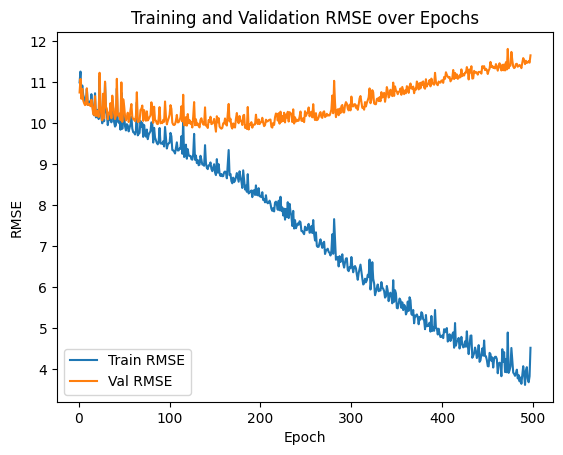

In [6]:
loss_output = """
Built signatures: {'N': 600, 'k': 8, 'num_starts': 200, 'n_walks': 2000, 'phalt': 0.01, 'tau': 8.0}
Dataset size: 120000
Epoch 01 | RMSE train: 10.988137 | RMSE val: 10.742049
Epoch 02 | RMSE train: 11.251599 | RMSE val: 11.072376
Epoch 03 | RMSE train: 10.740643 | RMSE val: 10.588548
Epoch 04 | RMSE train: 10.911603 | RMSE val: 10.830308
Epoch 05 | RMSE train: 10.686109 | RMSE val: 10.549955
Epoch 06 | RMSE train: 10.609428 | RMSE val: 10.481824
Epoch 07 | RMSE train: 10.531196 | RMSE val: 10.434436
Epoch 08 | RMSE train: 10.522396 | RMSE val: 10.451312
Epoch 09 | RMSE train: 10.831295 | RMSE val: 10.843548
Epoch 10 | RMSE train: 10.440214 | RMSE val: 10.440664
Epoch 11 | RMSE train: 10.448335 | RMSE val: 10.438563
Epoch 12 | RMSE train: 10.522883 | RMSE val: 10.460291
Epoch 13 | RMSE train: 10.435983 | RMSE val: 10.407537
Epoch 14 | RMSE train: 10.701471 | RMSE val: 10.565466
Epoch 15 | RMSE train: 10.447558 | RMSE val: 10.418728
Epoch 16 | RMSE train: 10.270341 | RMSE val: 10.213072
Epoch 17 | RMSE train: 10.186190 | RMSE val: 10.195450
Epoch 18 | RMSE train: 10.723793 | RMSE val: 10.653604
Epoch 19 | RMSE train: 10.134918 | RMSE val: 10.168313
Epoch 20 | RMSE train: 10.182932 | RMSE val: 10.280176
Epoch 21 | RMSE train: 10.319575 | RMSE val: 10.286345
Epoch 22 | RMSE train: 10.095517 | RMSE val: 10.143596
Epoch 23 | RMSE train: 11.144471 | RMSE val: 11.222274
Epoch 24 | RMSE train: 10.289106 | RMSE val: 10.412564
Epoch 25 | RMSE train: 10.120608 | RMSE val: 10.178884
Epoch 26 | RMSE train: 9.992718 | RMSE val: 10.063007
Epoch 27 | RMSE train: 10.557305 | RMSE val: 10.712850
Epoch 28 | RMSE train: 10.042810 | RMSE val: 10.111683
Epoch 29 | RMSE train: 10.981233 | RMSE val: 11.007079
Epoch 30 | RMSE train: 10.302961 | RMSE val: 10.397917
Epoch 31 | RMSE train: 10.212870 | RMSE val: 10.344022
Epoch 32 | RMSE train: 9.947622 | RMSE val: 10.089379
Epoch 33 | RMSE train: 10.094943 | RMSE val: 10.250022
Epoch 34 | RMSE train: 10.079101 | RMSE val: 10.210011
Epoch 35 | RMSE train: 10.353536 | RMSE val: 10.482963
Epoch 36 | RMSE train: 10.015937 | RMSE val: 10.115632
Epoch 37 | RMSE train: 10.475116 | RMSE val: 10.665460
Epoch 38 | RMSE train: 10.353971 | RMSE val: 10.418861
Epoch 39 | RMSE train: 10.017801 | RMSE val: 10.237289
Epoch 40 | RMSE train: 9.912204 | RMSE val: 10.095785
Epoch 41 | RMSE train: 9.947985 | RMSE val: 10.175054
Epoch 42 | RMSE train: 10.839404 | RMSE val: 11.074862
Epoch 43 | RMSE train: 10.045583 | RMSE val: 10.225461
Epoch 44 | RMSE train: 10.008013 | RMSE val: 10.162214
Epoch 45 | RMSE train: 10.061474 | RMSE val: 10.228781
Epoch 46 | RMSE train: 9.836393 | RMSE val: 10.070459
Epoch 47 | RMSE train: 10.738415 | RMSE val: 10.988264
Epoch 48 | RMSE train: 9.857444 | RMSE val: 10.027078
Epoch 49 | RMSE train: 10.284991 | RMSE val: 10.578786
Epoch 50 | RMSE train: 10.205208 | RMSE val: 10.422444
Epoch 51 | RMSE train: 9.920717 | RMSE val: 10.170997
Epoch 52 | RMSE train: 9.817265 | RMSE val: 10.063938
Epoch 53 | RMSE train: 9.971663 | RMSE val: 10.139109
Epoch 54 | RMSE train: 9.939800 | RMSE val: 10.250055
Epoch 55 | RMSE train: 9.794450 | RMSE val: 10.022705
Epoch 56 | RMSE train: 9.885536 | RMSE val: 10.110039
Epoch 57 | RMSE train: 9.960248 | RMSE val: 10.316035
Epoch 58 | RMSE train: 10.153740 | RMSE val: 10.460846
Epoch 59 | RMSE train: 9.862442 | RMSE val: 10.150297
Epoch 60 | RMSE train: 9.774553 | RMSE val: 10.091849
Epoch 61 | RMSE train: 9.768881 | RMSE val: 10.083621
Epoch 62 | RMSE train: 9.719149 | RMSE val: 10.045012
Epoch 63 | RMSE train: 9.812105 | RMSE val: 10.182644
Epoch 64 | RMSE train: 10.503071 | RMSE val: 10.747493
Epoch 65 | RMSE train: 9.698439 | RMSE val: 10.022706
Epoch 66 | RMSE train: 9.733188 | RMSE val: 10.037319
Epoch 67 | RMSE train: 9.757344 | RMSE val: 10.041815
Epoch 68 | RMSE train: 10.050713 | RMSE val: 10.314995
Epoch 69 | RMSE train: 9.910988 | RMSE val: 10.345567
Epoch 70 | RMSE train: 9.999739 | RMSE val: 10.424353
Epoch 71 | RMSE train: 9.661641 | RMSE val: 10.050623
Epoch 72 | RMSE train: 9.950147 | RMSE val: 10.313087
Epoch 73 | RMSE train: 9.750587 | RMSE val: 10.159393
Epoch 74 | RMSE train: 9.666087 | RMSE val: 10.054334
Epoch 75 | RMSE train: 9.839853 | RMSE val: 10.283221
Epoch 76 | RMSE train: 9.605854 | RMSE val: 10.062147
Epoch 77 | RMSE train: 9.712183 | RMSE val: 10.095966
Epoch 78 | RMSE train: 9.760331 | RMSE val: 10.145816
Epoch 79 | RMSE train: 9.795814 | RMSE val: 10.181423
Epoch 80 | RMSE train: 10.015225 | RMSE val: 10.502888
Epoch 81 | RMSE train: 9.986817 | RMSE val: 10.327656
Epoch 82 | RMSE train: 9.522888 | RMSE val: 10.003705
Epoch 83 | RMSE train: 9.881438 | RMSE val: 10.395664
Epoch 84 | RMSE train: 9.644554 | RMSE val: 10.069919
Epoch 85 | RMSE train: 9.575923 | RMSE val: 10.057957
Epoch 86 | RMSE train: 9.512928 | RMSE val: 9.984490
Epoch 87 | RMSE train: 9.480102 | RMSE val: 9.971683
Epoch 88 | RMSE train: 9.547213 | RMSE val: 10.106377
Epoch 89 | RMSE train: 9.878351 | RMSE val: 10.386654
Epoch 90 | RMSE train: 9.499289 | RMSE val: 9.991973
Epoch 91 | RMSE train: 9.506682 | RMSE val: 10.015871
Epoch 92 | RMSE train: 9.492817 | RMSE val: 9.995254
Epoch 93 | RMSE train: 9.554945 | RMSE val: 10.075606
Epoch 94 | RMSE train: 9.427651 | RMSE val: 10.027684
Epoch 95 | RMSE train: 9.901694 | RMSE val: 10.523578
Epoch 96 | RMSE train: 9.626635 | RMSE val: 10.156365
Epoch 97 | RMSE train: 9.378836 | RMSE val: 9.966640
Epoch 98 | RMSE train: 9.467205 | RMSE val: 10.048403
Epoch 99 | RMSE train: 9.503850 | RMSE val: 10.113491
Epoch 100 | RMSE train: 9.515397 | RMSE val: 10.200572
Epoch 101 | RMSE train: 9.759339 | RMSE val: 10.434135
Epoch 102 | RMSE train: 9.676337 | RMSE val: 10.343772
Epoch 103 | RMSE train: 9.343412 | RMSE val: 10.009554
Epoch 104 | RMSE train: 9.330406 | RMSE val: 9.959473
Epoch 105 | RMSE train: 9.303492 | RMSE val: 9.949564
Epoch 106 | RMSE train: 9.256593 | RMSE val: 9.967871
Epoch 107 | RMSE train: 9.395910 | RMSE val: 10.060260
Epoch 108 | RMSE train: 9.528106 | RMSE val: 10.196412
Epoch 109 | RMSE train: 9.330131 | RMSE val: 10.013014
Epoch 110 | RMSE train: 9.332147 | RMSE val: 10.019966
Epoch 111 | RMSE train: 9.380622 | RMSE val: 10.065541
Epoch 112 | RMSE train: 9.372910 | RMSE val: 10.136825
Epoch 113 | RMSE train: 9.677092 | RMSE val: 10.405543
Epoch 114 | RMSE train: 9.249732 | RMSE val: 10.037883
Epoch 115 | RMSE train: 10.100332 | RMSE val: 10.686978
Epoch 116 | RMSE train: 9.171329 | RMSE val: 9.947952
Epoch 117 | RMSE train: 9.196031 | RMSE val: 9.943035
Epoch 118 | RMSE train: 9.472353 | RMSE val: 10.141310
Epoch 119 | RMSE train: 9.130097 | RMSE val: 9.935631
Epoch 120 | RMSE train: 9.361977 | RMSE val: 10.216575
Epoch 121 | RMSE train: 9.210316 | RMSE val: 9.992402
Epoch 122 | RMSE train: 9.196777 | RMSE val: 10.069947
Epoch 123 | RMSE train: 9.198949 | RMSE val: 9.981150
Epoch 124 | RMSE train: 9.120247 | RMSE val: 10.024872
Epoch 125 | RMSE train: 9.105875 | RMSE val: 9.890479
Epoch 126 | RMSE train: 9.243854 | RMSE val: 10.158498
Epoch 127 | RMSE train: 9.734175 | RMSE val: 10.508866
Epoch 128 | RMSE train: 9.103835 | RMSE val: 9.945252
Epoch 129 | RMSE train: 9.205732 | RMSE val: 10.090645
Epoch 130 | RMSE train: 9.022408 | RMSE val: 9.948015
Epoch 131 | RMSE train: 9.097916 | RMSE val: 9.987438
Epoch 132 | RMSE train: 8.970801 | RMSE val: 9.923997
Epoch 133 | RMSE train: 8.985197 | RMSE val: 9.891755
Epoch 134 | RMSE train: 9.201159 | RMSE val: 10.075482
Epoch 135 | RMSE train: 9.107565 | RMSE val: 10.114745
Epoch 136 | RMSE train: 8.988158 | RMSE val: 10.022660
Epoch 137 | RMSE train: 8.999996 | RMSE val: 9.963392
Epoch 138 | RMSE train: 8.957352 | RMSE val: 9.956574
Epoch 139 | RMSE train: 9.460354 | RMSE val: 10.380256
Epoch 140 | RMSE train: 9.027259 | RMSE val: 9.934370
Epoch 141 | RMSE train: 8.907510 | RMSE val: 9.945507
Epoch 142 | RMSE train: 8.876683 | RMSE val: 9.877844
Epoch 143 | RMSE train: 8.966394 | RMSE val: 10.073117
Epoch 144 | RMSE train: 8.970492 | RMSE val: 10.029693
Epoch 145 | RMSE train: 9.039723 | RMSE val: 10.151654
Epoch 146 | RMSE train: 8.883613 | RMSE val: 9.972264
Epoch 147 | RMSE train: 8.827194 | RMSE val: 9.984830
Epoch 148 | RMSE train: 8.915953 | RMSE val: 10.020913
Epoch 149 | RMSE train: 8.996599 | RMSE val: 10.099944
Epoch 150 | RMSE train: 8.795698 | RMSE val: 9.952550
Epoch 151 | RMSE train: 8.730970 | RMSE val: 9.788178
Epoch 152 | RMSE train: 9.119745 | RMSE val: 10.163696
Epoch 153 | RMSE train: 8.792373 | RMSE val: 10.015726
Epoch 154 | RMSE train: 8.995695 | RMSE val: 10.117225
Epoch 155 | RMSE train: 8.772183 | RMSE val: 9.912861
Epoch 156 | RMSE train: 8.709960 | RMSE val: 9.879013
Epoch 157 | RMSE train: 8.758319 | RMSE val: 9.861101
Epoch 158 | RMSE train: 8.704232 | RMSE val: 9.880381
Epoch 159 | RMSE train: 8.706477 | RMSE val: 9.992422
Epoch 160 | RMSE train: 8.798287 | RMSE val: 9.984879
Epoch 161 | RMSE train: 8.818514 | RMSE val: 10.109386
Epoch 162 | RMSE train: 8.795247 | RMSE val: 9.971444
Epoch 163 | RMSE train: 8.653605 | RMSE val: 9.937251
Epoch 164 | RMSE train: 9.012372 | RMSE val: 10.228405
Epoch 165 | RMSE train: 9.341762 | RMSE val: 10.463826
Epoch 166 | RMSE train: 8.728280 | RMSE val: 10.037712
Epoch 167 | RMSE train: 8.759320 | RMSE val: 10.103990
Epoch 168 | RMSE train: 8.584490 | RMSE val: 9.910614
Epoch 169 | RMSE train: 8.531664 | RMSE val: 9.864270
Epoch 170 | RMSE train: 8.669764 | RMSE val: 9.989944
Epoch 171 | RMSE train: 8.559418 | RMSE val: 9.911821
Epoch 172 | RMSE train: 8.595890 | RMSE val: 9.889245
Epoch 173 | RMSE train: 8.681638 | RMSE val: 10.103994
Epoch 174 | RMSE train: 8.781110 | RMSE val: 10.242361
Epoch 175 | RMSE train: 8.671807 | RMSE val: 10.054215
Epoch 176 | RMSE train: 8.570203 | RMSE val: 9.994059
Epoch 177 | RMSE train: 8.823507 | RMSE val: 10.169030
Epoch 178 | RMSE train: 8.680452 | RMSE val: 10.045604
Epoch 179 | RMSE train: 8.581073 | RMSE val: 10.051153
Epoch 180 | RMSE train: 8.418026 | RMSE val: 9.950265
Epoch 181 | RMSE train: 8.847139 | RMSE val: 10.179489
Epoch 182 | RMSE train: 8.611887 | RMSE val: 10.197744
Epoch 183 | RMSE train: 8.381192 | RMSE val: 9.881590
Epoch 184 | RMSE train: 8.474975 | RMSE val: 9.942626
Epoch 185 | RMSE train: 8.324756 | RMSE val: 9.855708
Epoch 186 | RMSE train: 8.753717 | RMSE val: 10.389410
Epoch 187 | RMSE train: 8.283042 | RMSE val: 9.841171
Epoch 188 | RMSE train: 8.312033 | RMSE val: 9.963459
Epoch 189 | RMSE train: 8.330772 | RMSE val: 9.957491
Epoch 190 | RMSE train: 8.356863 | RMSE val: 10.019574
Epoch 191 | RMSE train: 8.194435 | RMSE val: 9.884879
Epoch 192 | RMSE train: 8.354267 | RMSE val: 9.959625
Epoch 193 | RMSE train: 8.361744 | RMSE val: 9.956228
Epoch 194 | RMSE train: 8.248425 | RMSE val: 9.966309
Epoch 195 | RMSE train: 8.480632 | RMSE val: 10.201557
Epoch 196 | RMSE train: 8.250064 | RMSE val: 10.027628
Epoch 197 | RMSE train: 8.239754 | RMSE val: 9.973979
Epoch 198 | RMSE train: 8.412982 | RMSE val: 10.087243
Epoch 199 | RMSE train: 8.217103 | RMSE val: 9.972321
Epoch 200 | RMSE train: 8.210452 | RMSE val: 10.008114
Epoch 201 | RMSE train: 8.193188 | RMSE val: 10.029423
Epoch 202 | RMSE train: 8.314558 | RMSE val: 10.126975
Epoch 203 | RMSE train: 8.124039 | RMSE val: 10.003974
Epoch 204 | RMSE train: 8.147042 | RMSE val: 9.922721
Epoch 205 | RMSE train: 8.067851 | RMSE val: 9.949779
Epoch 206 | RMSE train: 8.240611 | RMSE val: 10.080238
Epoch 207 | RMSE train: 8.076809 | RMSE val: 10.036935
Epoch 208 | RMSE train: 8.044937 | RMSE val: 10.040895
Epoch 209 | RMSE train: 8.060240 | RMSE val: 10.066632
Epoch 210 | RMSE train: 8.109002 | RMSE val: 10.078114
Epoch 211 | RMSE train: 8.032682 | RMSE val: 10.083513
Epoch 212 | RMSE train: 7.911259 | RMSE val: 9.906776
Epoch 213 | RMSE train: 7.861450 | RMSE val: 9.887430
Epoch 214 | RMSE train: 7.928080 | RMSE val: 10.000677
Epoch 215 | RMSE train: 7.845944 | RMSE val: 9.951686
Epoch 216 | RMSE train: 8.063740 | RMSE val: 10.141208
Epoch 217 | RMSE train: 8.084703 | RMSE val: 10.231030
Epoch 218 | RMSE train: 8.010458 | RMSE val: 10.209666
Epoch 219 | RMSE train: 7.888716 | RMSE val: 10.058685
Epoch 220 | RMSE train: 8.107782 | RMSE val: 10.237661
Epoch 221 | RMSE train: 7.875141 | RMSE val: 9.983805
Epoch 222 | RMSE train: 8.203682 | RMSE val: 10.275389
Epoch 223 | RMSE train: 7.860263 | RMSE val: 10.026240
Epoch 224 | RMSE train: 7.945744 | RMSE val: 10.168041
Epoch 225 | RMSE train: 7.748185 | RMSE val: 10.046945
Epoch 226 | RMSE train: 7.912931 | RMSE val: 10.249041
Epoch 227 | RMSE train: 7.646756 | RMSE val: 10.013061
Epoch 228 | RMSE train: 7.908310 | RMSE val: 10.205804
Epoch 229 | RMSE train: 7.707946 | RMSE val: 10.132621
Epoch 230 | RMSE train: 8.071417 | RMSE val: 10.271889
Epoch 231 | RMSE train: 7.684517 | RMSE val: 10.034691
Epoch 232 | RMSE train: 8.031724 | RMSE val: 10.263346
Epoch 233 | RMSE train: 7.841752 | RMSE val: 10.242436
Epoch 234 | RMSE train: 7.735712 | RMSE val: 10.212349
Epoch 235 | RMSE train: 7.492074 | RMSE val: 10.022463
Epoch 236 | RMSE train: 7.859932 | RMSE val: 10.332210
Epoch 237 | RMSE train: 7.430421 | RMSE val: 9.986549
Epoch 238 | RMSE train: 7.634625 | RMSE val: 10.139093
Epoch 239 | RMSE train: 7.437330 | RMSE val: 10.034633
Epoch 240 | RMSE train: 7.500124 | RMSE val: 10.081188
Epoch 241 | RMSE train: 7.553358 | RMSE val: 10.050961
Epoch 242 | RMSE train: 7.521982 | RMSE val: 10.055831
Epoch 243 | RMSE train: 7.607663 | RMSE val: 10.150391
Epoch 244 | RMSE train: 7.586421 | RMSE val: 10.279162
Epoch 245 | RMSE train: 7.372381 | RMSE val: 10.058064
Epoch 246 | RMSE train: 7.365434 | RMSE val: 10.047266
Epoch 247 | RMSE train: 7.331565 | RMSE val: 10.116154
Epoch 248 | RMSE train: 7.293231 | RMSE val: 10.020265
Epoch 249 | RMSE train: 7.475629 | RMSE val: 10.285573
Epoch 250 | RMSE train: 7.411483 | RMSE val: 10.170536
Epoch 251 | RMSE train: 7.388648 | RMSE val: 10.226220
Epoch 252 | RMSE train: 7.476968 | RMSE val: 10.262524
Epoch 253 | RMSE train: 7.544454 | RMSE val: 10.377684
Epoch 254 | RMSE train: 7.328432 | RMSE val: 10.161630
Epoch 255 | RMSE train: 7.340480 | RMSE val: 10.241500
Epoch 256 | RMSE train: 7.489558 | RMSE val: 10.273137
Epoch 257 | RMSE train: 7.320834 | RMSE val: 10.137121
Epoch 258 | RMSE train: 7.636887 | RMSE val: 10.457790
Epoch 259 | RMSE train: 7.299819 | RMSE val: 10.167016
Epoch 260 | RMSE train: 7.139608 | RMSE val: 10.071168
Epoch 261 | RMSE train: 7.337974 | RMSE val: 10.239253
Epoch 262 | RMSE train: 7.006915 | RMSE val: 10.068796
Epoch 263 | RMSE train: 6.982801 | RMSE val: 10.084353
Epoch 264 | RMSE train: 6.986816 | RMSE val: 10.137253
Epoch 265 | RMSE train: 7.085095 | RMSE val: 10.223938
Epoch 266 | RMSE train: 7.167800 | RMSE val: 10.264577
Epoch 267 | RMSE train: 7.042769 | RMSE val: 10.145525
Epoch 268 | RMSE train: 6.959177 | RMSE val: 10.124228
Epoch 269 | RMSE train: 7.082605 | RMSE val: 10.260143
Epoch 270 | RMSE train: 7.108045 | RMSE val: 10.283959
Epoch 271 | RMSE train: 6.809916 | RMSE val: 10.144960
Epoch 272 | RMSE train: 6.888292 | RMSE val: 10.167315
Epoch 273 | RMSE train: 6.913869 | RMSE val: 10.223831
Epoch 274 | RMSE train: 6.939209 | RMSE val: 10.177697
Epoch 275 | RMSE train: 6.861967 | RMSE val: 10.195633
Epoch 276 | RMSE train: 6.837885 | RMSE val: 10.182565
Epoch 277 | RMSE train: 6.773748 | RMSE val: 10.242056
Epoch 278 | RMSE train: 6.888336 | RMSE val: 10.326604
Epoch 279 | RMSE train: 7.290502 | RMSE val: 10.667519
Epoch 280 | RMSE train: 6.815521 | RMSE val: 10.237074
Epoch 281 | RMSE train: 7.659383 | RMSE val: 11.025933
Epoch 282 | RMSE train: 7.158746 | RMSE val: 10.494641
Epoch 283 | RMSE train: 6.670643 | RMSE val: 10.142269
Epoch 284 | RMSE train: 6.696340 | RMSE val: 10.275059
Epoch 285 | RMSE train: 6.739157 | RMSE val: 10.333242
Epoch 286 | RMSE train: 6.508328 | RMSE val: 10.188826
Epoch 287 | RMSE train: 6.758712 | RMSE val: 10.348390
Epoch 288 | RMSE train: 6.614412 | RMSE val: 10.237745
Epoch 289 | RMSE train: 6.655825 | RMSE val: 10.408529
Epoch 290 | RMSE train: 6.802806 | RMSE val: 10.438239
Epoch 291 | RMSE train: 6.573154 | RMSE val: 10.261872
Epoch 292 | RMSE train: 6.479282 | RMSE val: 10.254566
Epoch 293 | RMSE train: 6.608713 | RMSE val: 10.434296
Epoch 294 | RMSE train: 6.700113 | RMSE val: 10.507244
Epoch 295 | RMSE train: 6.707459 | RMSE val: 10.469772
Epoch 296 | RMSE train: 6.426597 | RMSE val: 10.351648
Epoch 297 | RMSE train: 6.392618 | RMSE val: 10.306084
Epoch 298 | RMSE train: 6.493012 | RMSE val: 10.444559
Epoch 299 | RMSE train: 6.463320 | RMSE val: 10.306688
Epoch 300 | RMSE train: 6.736873 | RMSE val: 10.642772
Epoch 301 | RMSE train: 6.508437 | RMSE val: 10.405094
Epoch 302 | RMSE train: 6.365439 | RMSE val: 10.404696
Epoch 303 | RMSE train: 6.488084 | RMSE val: 10.453840
Epoch 304 | RMSE train: 6.516820 | RMSE val: 10.458261
Epoch 305 | RMSE train: 6.463702 | RMSE val: 10.367950
Epoch 306 | RMSE train: 6.308238 | RMSE val: 10.426329
Epoch 307 | RMSE train: 6.182870 | RMSE val: 10.319502
Epoch 308 | RMSE train: 6.346088 | RMSE val: 10.440556
Epoch 309 | RMSE train: 6.450933 | RMSE val: 10.601220
Epoch 310 | RMSE train: 6.552158 | RMSE val: 10.655543
Epoch 311 | RMSE train: 6.379806 | RMSE val: 10.505047
Epoch 312 | RMSE train: 6.217265 | RMSE val: 10.369330
Epoch 313 | RMSE train: 6.068166 | RMSE val: 10.383236
Epoch 314 | RMSE train: 6.094798 | RMSE val: 10.322972
Epoch 315 | RMSE train: 6.208736 | RMSE val: 10.508219
Epoch 316 | RMSE train: 6.122321 | RMSE val: 10.401482
Epoch 317 | RMSE train: 6.172780 | RMSE val: 10.491390
Epoch 318 | RMSE train: 6.306052 | RMSE val: 10.552547
Epoch 319 | RMSE train: 6.256471 | RMSE val: 10.623666
Epoch 320 | RMSE train: 6.674897 | RMSE val: 10.841470
Epoch 321 | RMSE train: 5.945656 | RMSE val: 10.481369
Epoch 322 | RMSE train: 6.147799 | RMSE val: 10.562016
Epoch 323 | RMSE train: 6.611411 | RMSE val: 10.799301
Epoch 324 | RMSE train: 6.206710 | RMSE val: 10.747503
Epoch 325 | RMSE train: 6.097448 | RMSE val: 10.476814
Epoch 326 | RMSE train: 5.808097 | RMSE val: 10.458048
Epoch 327 | RMSE train: 5.891624 | RMSE val: 10.456928
Epoch 328 | RMSE train: 5.988377 | RMSE val: 10.583914
Epoch 329 | RMSE train: 6.069240 | RMSE val: 10.597613
Epoch 330 | RMSE train: 5.905020 | RMSE val: 10.532430
Epoch 331 | RMSE train: 5.940148 | RMSE val: 10.628609
Epoch 332 | RMSE train: 5.921011 | RMSE val: 10.528862
Epoch 333 | RMSE train: 6.126405 | RMSE val: 10.750392
Epoch 334 | RMSE train: 5.995226 | RMSE val: 10.618002
Epoch 335 | RMSE train: 5.962597 | RMSE val: 10.681485
Epoch 336 | RMSE train: 5.909283 | RMSE val: 10.733502
Epoch 337 | RMSE train: 5.749203 | RMSE val: 10.515953
Epoch 338 | RMSE train: 5.778569 | RMSE val: 10.651112
Epoch 339 | RMSE train: 6.032249 | RMSE val: 10.873498
Epoch 340 | RMSE train: 5.911040 | RMSE val: 10.779700
Epoch 341 | RMSE train: 5.662507 | RMSE val: 10.618812
Epoch 342 | RMSE train: 5.841237 | RMSE val: 10.667156
Epoch 343 | RMSE train: 5.868378 | RMSE val: 10.809408
Epoch 344 | RMSE train: 5.765121 | RMSE val: 10.702262
Epoch 345 | RMSE train: 5.610617 | RMSE val: 10.653827
Epoch 346 | RMSE train: 6.172659 | RMSE val: 10.982809
Epoch 347 | RMSE train: 5.646738 | RMSE val: 10.659819
Epoch 348 | RMSE train: 5.929163 | RMSE val: 10.888611
Epoch 349 | RMSE train: 5.856039 | RMSE val: 10.790675
Epoch 350 | RMSE train: 5.497254 | RMSE val: 10.765650
Epoch 351 | RMSE train: 5.487677 | RMSE val: 10.700725
Epoch 352 | RMSE train: 5.609154 | RMSE val: 10.754618
Epoch 353 | RMSE train: 5.726035 | RMSE val: 10.768174
Epoch 354 | RMSE train: 5.684726 | RMSE val: 10.840873
Epoch 355 | RMSE train: 5.499448 | RMSE val: 10.685870
Epoch 356 | RMSE train: 5.633527 | RMSE val: 10.877697
Epoch 357 | RMSE train: 5.445580 | RMSE val: 10.784214
Epoch 358 | RMSE train: 5.573630 | RMSE val: 10.701089
Epoch 359 | RMSE train: 5.539593 | RMSE val: 10.792424
Epoch 360 | RMSE train: 5.339224 | RMSE val: 10.723145
Epoch 361 | RMSE train: 5.400252 | RMSE val: 10.896369
Epoch 362 | RMSE train: 5.652730 | RMSE val: 10.861342
Epoch 363 | RMSE train: 5.424048 | RMSE val: 10.733085
Epoch 364 | RMSE train: 5.758355 | RMSE val: 10.887167
Epoch 365 | RMSE train: 5.683937 | RMSE val: 10.961756
Epoch 366 | RMSE train: 5.348276 | RMSE val: 10.840309
Epoch 367 | RMSE train: 5.323775 | RMSE val: 10.833481
Epoch 368 | RMSE train: 5.447266 | RMSE val: 10.886528
Epoch 369 | RMSE train: 5.123769 | RMSE val: 10.724847
Epoch 370 | RMSE train: 5.312151 | RMSE val: 10.835137
Epoch 371 | RMSE train: 5.289077 | RMSE val: 10.810258
Epoch 372 | RMSE train: 5.339742 | RMSE val: 11.009985
Epoch 373 | RMSE train: 5.283740 | RMSE val: 10.939679
Epoch 374 | RMSE train: 5.100416 | RMSE val: 10.816820
Epoch 375 | RMSE train: 5.274441 | RMSE val: 10.969419
Epoch 376 | RMSE train: 5.214766 | RMSE val: 10.842529
Epoch 377 | RMSE train: 5.393762 | RMSE val: 10.987075
Epoch 378 | RMSE train: 5.358565 | RMSE val: 10.921837
Epoch 379 | RMSE train: 5.220392 | RMSE val: 11.012860
Epoch 380 | RMSE train: 5.198379 | RMSE val: 10.859459
Epoch 381 | RMSE train: 4.980019 | RMSE val: 10.834220
Epoch 382 | RMSE train: 5.325645 | RMSE val: 11.064791
Epoch 383 | RMSE train: 5.048980 | RMSE val: 10.887991
Epoch 384 | RMSE train: 5.082719 | RMSE val: 10.955125
Epoch 385 | RMSE train: 5.060459 | RMSE val: 10.949714
Epoch 386 | RMSE train: 5.139496 | RMSE val: 11.047034
Epoch 387 | RMSE train: 4.921159 | RMSE val: 10.891419
Epoch 388 | RMSE train: 5.301998 | RMSE val: 11.080137
Epoch 389 | RMSE train: 4.938208 | RMSE val: 10.973724
Epoch 390 | RMSE train: 5.021498 | RMSE val: 10.948323
Epoch 391 | RMSE train: 4.941868 | RMSE val: 10.931474
Epoch 392 | RMSE train: 5.446954 | RMSE val: 11.220394
Epoch 393 | RMSE train: 5.005542 | RMSE val: 10.994442
Epoch 394 | RMSE train: 4.998550 | RMSE val: 10.941687
Epoch 395 | RMSE train: 4.852229 | RMSE val: 10.919163
Epoch 396 | RMSE train: 4.991511 | RMSE val: 11.008071
Epoch 397 | RMSE train: 4.862039 | RMSE val: 10.988383
Epoch 398 | RMSE train: 4.788794 | RMSE val: 10.982343
Epoch 399 | RMSE train: 4.796914 | RMSE val: 11.031844
Epoch 400 | RMSE train: 4.827549 | RMSE val: 11.035905
Epoch 401 | RMSE train: 4.761763 | RMSE val: 10.975882
Epoch 402 | RMSE train: 4.981077 | RMSE val: 11.119238
Epoch 403 | RMSE train: 4.905497 | RMSE val: 11.074472
Epoch 404 | RMSE train: 4.967904 | RMSE val: 11.234587
Epoch 405 | RMSE train: 5.007654 | RMSE val: 11.172729
Epoch 406 | RMSE train: 4.678525 | RMSE val: 11.125317
Epoch 407 | RMSE train: 4.726118 | RMSE val: 11.102616
Epoch 408 | RMSE train: 4.856252 | RMSE val: 11.120460
Epoch 409 | RMSE train: 4.692800 | RMSE val: 11.012802
Epoch 410 | RMSE train: 4.762252 | RMSE val: 11.053600
Epoch 411 | RMSE train: 4.850759 | RMSE val: 11.091659
Epoch 412 | RMSE train: 4.902536 | RMSE val: 11.289974
Epoch 413 | RMSE train: 4.528825 | RMSE val: 11.069289
Epoch 414 | RMSE train: 5.130073 | RMSE val: 11.219564
Epoch 415 | RMSE train: 4.579914 | RMSE val: 11.098212
Epoch 416 | RMSE train: 4.685130 | RMSE val: 11.183514
Epoch 417 | RMSE train: 4.698465 | RMSE val: 11.074815
Epoch 418 | RMSE train: 4.768079 | RMSE val: 11.094153
Epoch 419 | RMSE train: 4.510158 | RMSE val: 11.159805
Epoch 420 | RMSE train: 4.639366 | RMSE val: 11.111989
Epoch 421 | RMSE train: 4.794062 | RMSE val: 11.303973
Epoch 422 | RMSE train: 4.607238 | RMSE val: 11.140881
Epoch 423 | RMSE train: 4.537259 | RMSE val: 11.191404
Epoch 424 | RMSE train: 4.552339 | RMSE val: 11.155733
Epoch 425 | RMSE train: 4.684125 | RMSE val: 11.226898
Epoch 426 | RMSE train: 4.553524 | RMSE val: 11.222866
Epoch 427 | RMSE train: 4.928353 | RMSE val: 11.361275
Epoch 428 | RMSE train: 4.598056 | RMSE val: 11.277307
Epoch 429 | RMSE train: 4.373016 | RMSE val: 11.059555
Epoch 430 | RMSE train: 4.585046 | RMSE val: 11.303146
Epoch 431 | RMSE train: 4.821195 | RMSE val: 11.228414
Epoch 432 | RMSE train: 4.827932 | RMSE val: 11.381304
Epoch 433 | RMSE train: 4.283550 | RMSE val: 11.080428
Epoch 434 | RMSE train: 4.332552 | RMSE val: 11.087720
Epoch 435 | RMSE train: 4.393923 | RMSE val: 11.268822
Epoch 436 | RMSE train: 4.533702 | RMSE val: 11.219479
Epoch 437 | RMSE train: 4.448200 | RMSE val: 11.240849
Epoch 438 | RMSE train: 4.277220 | RMSE val: 11.225839
Epoch 439 | RMSE train: 4.352623 | RMSE val: 11.176469
Epoch 440 | RMSE train: 4.592548 | RMSE val: 11.243637
Epoch 441 | RMSE train: 4.185039 | RMSE val: 11.241346
Epoch 442 | RMSE train: 4.221737 | RMSE val: 11.244031
Epoch 443 | RMSE train: 4.377358 | RMSE val: 11.201050
Epoch 444 | RMSE train: 4.512168 | RMSE val: 11.383682
Epoch 445 | RMSE train: 4.334931 | RMSE val: 11.336218
Epoch 446 | RMSE train: 4.705408 | RMSE val: 11.383751
Epoch 447 | RMSE train: 4.326526 | RMSE val: 11.287359
Epoch 448 | RMSE train: 4.321414 | RMSE val: 11.318966
Epoch 449 | RMSE train: 4.228412 | RMSE val: 11.289421
Epoch 450 | RMSE train: 4.079575 | RMSE val: 11.192392
Epoch 451 | RMSE train: 4.074776 | RMSE val: 11.276613
Epoch 452 | RMSE train: 4.404230 | RMSE val: 11.321284
Epoch 453 | RMSE train: 4.374819 | RMSE val: 11.486313
Epoch 454 | RMSE train: 4.208331 | RMSE val: 11.361512
Epoch 455 | RMSE train: 4.293911 | RMSE val: 11.391031
Epoch 456 | RMSE train: 4.046797 | RMSE val: 11.340055
Epoch 457 | RMSE train: 4.256969 | RMSE val: 11.356454
Epoch 458 | RMSE train: 4.306764 | RMSE val: 11.327997
Epoch 459 | RMSE train: 4.308705 | RMSE val: 11.433218
Epoch 460 | RMSE train: 4.252957 | RMSE val: 11.348379
Epoch 461 | RMSE train: 3.907384 | RMSE val: 11.273122
Epoch 462 | RMSE train: 4.143557 | RMSE val: 11.393015
Epoch 463 | RMSE train: 4.165412 | RMSE val: 11.454157
Epoch 464 | RMSE train: 4.131622 | RMSE val: 11.352208
Epoch 465 | RMSE train: 3.835180 | RMSE val: 11.278206
Epoch 466 | RMSE train: 4.493392 | RMSE val: 11.416508
Epoch 467 | RMSE train: 4.184059 | RMSE val: 11.283810
Epoch 468 | RMSE train: 4.420461 | RMSE val: 11.423878
Epoch 469 | RMSE train: 3.936531 | RMSE val: 11.278455
Epoch 470 | RMSE train: 4.255334 | RMSE val: 11.480058
Epoch 471 | RMSE train: 3.930725 | RMSE val: 11.301972
Epoch 472 | RMSE train: 4.899191 | RMSE val: 11.802638
Epoch 473 | RMSE train: 3.916561 | RMSE val: 11.331517
Epoch 474 | RMSE train: 3.978992 | RMSE val: 11.406555
Epoch 475 | RMSE train: 4.074652 | RMSE val: 11.397672
Epoch 476 | RMSE train: 4.523188 | RMSE val: 11.729814
Epoch 477 | RMSE train: 4.208187 | RMSE val: 11.525943
Epoch 478 | RMSE train: 3.924006 | RMSE val: 11.375371
Epoch 479 | RMSE train: 3.892443 | RMSE val: 11.336089
Epoch 480 | RMSE train: 3.844579 | RMSE val: 11.354805
Epoch 481 | RMSE train: 3.912965 | RMSE val: 11.433147
Epoch 482 | RMSE train: 3.995327 | RMSE val: 11.440942
Epoch 483 | RMSE train: 3.780165 | RMSE val: 11.369940
Epoch 484 | RMSE train: 3.862176 | RMSE val: 11.392178
Epoch 485 | RMSE train: 3.708710 | RMSE val: 11.411274
Epoch 486 | RMSE train: 3.805049 | RMSE val: 11.390304
Epoch 487 | RMSE train: 3.650821 | RMSE val: 11.334432
Epoch 488 | RMSE train: 3.856577 | RMSE val: 11.467340
Epoch 489 | RMSE train: 4.078997 | RMSE val: 11.578939
Epoch 490 | RMSE train: 3.892745 | RMSE val: 11.533488
Epoch 491 | RMSE train: 3.623564 | RMSE val: 11.432265
Epoch 492 | RMSE train: 3.978815 | RMSE val: 11.513927
Epoch 493 | RMSE train: 4.056369 | RMSE val: 11.464231
Epoch 494 | RMSE train: 3.769645 | RMSE val: 11.472627
Epoch 495 | RMSE train: 3.688188 | RMSE val: 11.504419
Epoch 496 | RMSE train: 3.833188 | RMSE val: 11.467943
Epoch 497 | RMSE train: 4.527192 | RMSE val: 11.646419
"""

# print loss output graph
import re
import matplotlib.pyplot as plt
epochs = []
train_rmses = []
val_rmses = []
for line in loss_output.strip().split("\n"):
    m = re.match(r"Epoch (\d+) \| RMSE train: ([\d.]+) \| RMSE val: ([\d.]+)", line)
    if m:
        epochs.append(int(m.group(1)))
        train_rmses.append(float(m.group(2)))
        val_rmses.append(float(m.group(3)))
plt.plot(epochs, train_rmses, label="Train RMSE")
plt.plot(epochs, val_rmses, label="Val RMSE")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("Training and Validation RMSE over Epochs")
plt.legend()